to do:

2) check for students who have events in high school AFTER the year we are looking at (that should not happen)

3) create better diagrams for results

steps to process the ranked athlete file:

1) Edit the file Div1TrackFieldTopAthletes.xslx in MyDrive\TrackFIeldData\RankedAthletes

2) Save the 2019 Male file to this same folder as Div1TrackFieldTopAthletes2019M.csv

3) Save the 2020 Male file to this same folder as Div1TrackFieldTopAthletes2020M.csv

4) OPen this notebook RankedAthletes.ipynb and run the first part to create the output files in folder /content/gdrive/MyDrive/TrackFieldData/RankedAthletes/Div1TrackFieldTopAthletesAllClean.csv

5) This file contains a consolidated list of athletes and links but does not contain event data. Take this file and run it with the screen scrapper with function get_events_for_ranked_athletes(username, password) to get the files RankAthletesEvents1.csv, 2.csv etc. These contain the events for the athletes

6) Put those files into the folder [root]\TrackFieldData\RankedAthletes

7) Open the notebook RankedAthletes.ipynb and run the second part, which reads these RankedAthleteEvents#.csv files and does analysis of them

In [1]:
import json
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import missingno as mno
import datetime
import seaborn as sns
import datetime as datetime

In [2]:
from google.colab import drive

In [3]:
from os.path import exists

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# get the ranked athletes lists (manually created) and combine them

What I really need is the grade, athlete name, link to the althete HS, link to athlete College, and Went to Div 1 TF

https://superuser.com/questions/430260/excel-convert-a-column-with-hyperlinks-to-just-display-the-links

https://www.excel-university.com/extract-url-from-hyperlink-with-an-excel-formula/

In [5]:
df_ranked_athletes_2019M = pd.read_csv("/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/Div1TrackFieldTopAthletes2019F.csv")
df_ranked_athletes_2019M.head()


,Rank,Age,Grade,Athlete,AthleteLink,MarkState,ST,Team,Date,Meet,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1.0,NaN,11,Briana Williams,https://www.athletic.net/athlete/12709856/trac...,22.88 (-1.6)PR,NaN,Unattached,Jun 08,Great Southwest Classic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,22.95 (2.6)PR,NaN,Athletic Development Group,Jun 16,2019 New Balance Nationals Outdoor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,16.0,10,Tamari Davis,https://www.athletic.net/athlete/14534092/trac...,22.96 (-.4),FL,Empire Athletics,May 26,2019 Atlanta Georgia Relays,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,16.0,9,Kayla Davis,https://www.athletic.net/athlete/22451816/trac...,23.08PR,NC,Run U Xpress,May 26,13th Annual Mark Trail Memorial Day Meet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,18.0,12,Taylor Gilling,https://www.athletic.net/athlete/9387401/track...,23.10 (5.6)PR,IL,Highland Park,May 18,IHSA 3A Girls State Track & Field Championships,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_ranked_athletes_2019M.columns

Index(['Rank', 'Age', 'Grade', 'Athlete', 'AthleteLink', 'MarkState', 'ST',
       'Team', 'Date', 'Meet', 'CollegeLink', 'CollegeBioLink', 'WentToDivITF',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [7]:
df_ranked_athletes_2019M["RankYear"] = 2019

In [8]:
df_ranked_athletes_2020M = pd.read_csv("/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/Div1TrackFieldTopAthletes2020F.csv")
df_ranked_athletes_2020M.head()


,Rank,Age,Grade,Athlete,AthleteLink,Mark,ST,Team,Date,Meet,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1.0,NaN,12,Jayla Hollis,https://www.athletic.net/athlete/21731967/trac...,23.59,TX,DeSoto,Feb 15,Dallas Adams HS Cougar Relays,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,17.0,10,Jassani Carter,https://www.athletic.net/athlete/21732075/trac...,23.64 (3.7),FL,Flanagan,Mar 07,Sam Burley Hall of Fame Invitational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,11,Lamaria Washington,https://www.athletic.net/athlete/12709782/trac...,23.76 (1.7)PR,FL,Miami Northwestern,Mar 07,Sam Burley Hall of Fame Invitational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,18.0,12,Talitha Diggs,https://www.athletic.net/athlete/12074889/trac...,23.79 (.5),NaN,Unattached,Aug 08,AAU National Junior Olympic Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,16.0,10,Alyssa Jones,https://www.athletic.net/athlete/14500997/trac...,23.90 (.3),FL,Miami Southridge,Mar 10,GMAC Qualifier,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_ranked_athletes_2020M["RankYear"] = 2020

In [10]:
df_ranked_athletes_2020M.columns

Index(['Rank', 'Age', 'Grade', 'Athlete', 'AthleteLink', 'Mark', 'ST', 'Team',
       'Date', 'Meet', 'CollegeLink', 'CollegeBioLink', 'WentToDivITF',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'RankYear'],
      dtype='object')

In [11]:
df_ranked_athletes_2020M

,Rank,Age,Grade,Athlete,AthleteLink,Mark,ST,Team,Date,Meet,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,RankYear
0,1.0,NaN,12,Jayla Hollis,https://www.athletic.net/athlete/21731967/trac...,23.59,TX,DeSoto,Feb 15,Dallas Adams HS Cougar Relays,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,2.0,17.0,10,Jassani Carter,https://www.athletic.net/athlete/21732075/trac...,23.64 (3.7),FL,Flanagan,Mar 07,Sam Burley Hall of Fame Invitational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
2,3.0,NaN,11,Lamaria Washington,https://www.athletic.net/athlete/12709782/trac...,23.76 (1.7)PR,FL,Miami Northwestern,Mar 07,Sam Burley Hall of Fame Invitational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,4.0,18.0,12,Talitha Diggs,https://www.athletic.net/athlete/12074889/trac...,23.79 (.5),NaN,Unattached,Aug 08,AAU National Junior Olympic Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,5.0,16.0,10,Alyssa Jones,https://www.athletic.net/athlete/14500997/trac...,23.90 (.3),FL,Miami Southridge,Mar 10,GMAC Qualifier,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,10,Ayanna Jones,https://www.athletic.net/athlete/21751361/trac...,25.63,TX,Belton,14-Feb,Leander Lion Relays,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
296,NaN,NaN,11,Zoe Adams,https://www.athletic.net/athlete/12714333/trac...,25.63,GA,Marietta,11-Mar,Marietta Meet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
297,298.0,18.0,11,Zacaria Hopkins,https://www.athletic.net/athlete/12299284/trac...,25.64PR,TX,Killeen,27-Feb,Copperas Cove Bulldawg Relays,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
298,NaN,NaN,11,Journi Williams,https://www.athletic.net/athlete/19411101/trac...,25.64,TX,Conroe Woodlands College Park,28-Feb,Stafford Spartan Relays,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [12]:
df_ranked_athletes_2019M[["Rank", "Age", "Grade", "Athlete", "AthleteLink","RankYear", "WentToDivITF"]]

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,11,Briana Williams,https://www.athletic.net/athlete/12709856/trac...,2019,No
1,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes
2,3.0,16.0,10,Tamari Davis,https://www.athletic.net/athlete/14534092/trac...,2019,No
3,4.0,16.0,9,Kayla Davis,https://www.athletic.net/athlete/22451816/trac...,2019,Yes
4,5.0,18.0,12,Taylor Gilling,https://www.athletic.net/athlete/9387401/track...,2019,Yes
...,...,...,...,...,...,...,...
295,NaN,18.0,12,Shauntae Nelson,https://www.athletic.net/athlete/12043919/trac...,2019,Yes
296,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN
297,NaN,17.0,11,Breanna Miles,https://www.athletic.net/athlete/11433339/trac...,2019,NaN
298,NaN,NaN,11,Lawryn Noel,https://www.athletic.net/athlete/14371053/trac...,2019,NaN


In [13]:
df_ranked_athletes_2019M[df_ranked_athletes_2019M["WentToDivITF"].notna()]["WentToDivITF"]

0       No
1      Yes
2       No
3      Yes
4      Yes
      ... 
278    Yes
279    Yes
280    Yes
288     No
295    Yes
Name: WentToDivITF, Length: 117, dtype: object

In [14]:
len(df_ranked_athletes_2019M[df_ranked_athletes_2019M["WentToDivITF"].notna()])

117

In [15]:
df_ranked_athletes_2020M[["Rank", "Age", "Grade", "Athlete", "AthleteLink","RankYear","WentToDivITF"]].head()

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,12,Jayla Hollis,https://www.athletic.net/athlete/21731967/trac...,2020,Yes
1,2.0,17.0,10,Jassani Carter,https://www.athletic.net/athlete/21732075/trac...,2020,NaN
2,3.0,NaN,11,Lamaria Washington,https://www.athletic.net/athlete/12709782/trac...,2020,NaN
3,4.0,18.0,12,Talitha Diggs,https://www.athletic.net/athlete/12074889/trac...,2020,Yes
4,5.0,16.0,10,Alyssa Jones,https://www.athletic.net/athlete/14500997/trac...,2020,NaN


In [16]:
df_ranked_athletes_all = pd.concat([df_ranked_athletes_2019M[["Rank", "Age", "Grade", "Athlete", "AthleteLink","RankYear","WentToDivITF"]],df_ranked_athletes_2020M[["Rank", "Age", "Grade", "Athlete", "AthleteLink","RankYear","WentToDivITF"]]], axis=0)
len(df_ranked_athletes_all)

600

In [17]:
len(df_ranked_athletes_all["AthleteLink"].unique())

528

In [18]:
len(df_ranked_athletes_all)

600

# get the event data and combine

In [19]:
df_ranked_athletes_all

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,11,Briana Williams,https://www.athletic.net/athlete/12709856/trac...,2019,No
1,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes
2,3.0,16.0,10,Tamari Davis,https://www.athletic.net/athlete/14534092/trac...,2019,No
3,4.0,16.0,9,Kayla Davis,https://www.athletic.net/athlete/22451816/trac...,2019,Yes
4,5.0,18.0,12,Taylor Gilling,https://www.athletic.net/athlete/9387401/track...,2019,Yes
...,...,...,...,...,...,...,...
295,NaN,NaN,10,Ayanna Jones,https://www.athletic.net/athlete/21751361/trac...,2020,No
296,NaN,NaN,11,Zoe Adams,https://www.athletic.net/athlete/12714333/trac...,2020,NaN
297,298.0,18.0,11,Zacaria Hopkins,https://www.athletic.net/athlete/12299284/trac...,2020,NaN
298,NaN,NaN,11,Journi Williams,https://www.athletic.net/athlete/19411101/trac...,2020,NaN


In [20]:
# prompt: rows in df_ranked_athletes_all where AthleteLink is not Nan

df_ranked_athletes_all = df_ranked_athletes_all[df_ranked_athletes_all["AthleteLink"].notna()]


In [21]:
df_ranked_athletes_all

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,11,Briana Williams,https://www.athletic.net/athlete/12709856/trac...,2019,No
1,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes
2,3.0,16.0,10,Tamari Davis,https://www.athletic.net/athlete/14534092/trac...,2019,No
3,4.0,16.0,9,Kayla Davis,https://www.athletic.net/athlete/22451816/trac...,2019,Yes
4,5.0,18.0,12,Taylor Gilling,https://www.athletic.net/athlete/9387401/track...,2019,Yes
...,...,...,...,...,...,...,...
295,NaN,NaN,10,Ayanna Jones,https://www.athletic.net/athlete/21751361/trac...,2020,No
296,NaN,NaN,11,Zoe Adams,https://www.athletic.net/athlete/12714333/trac...,2020,NaN
297,298.0,18.0,11,Zacaria Hopkins,https://www.athletic.net/athlete/12299284/trac...,2020,NaN
298,NaN,NaN,11,Journi Williams,https://www.athletic.net/athlete/19411101/trac...,2020,NaN


#### filter out everyone except 12 grade (graduating seniors)

In [22]:
# prompt: if Grade is "SR" change to "12" in df_ranked_athletes_all

df_ranked_athletes_all['Grade'].replace('Sr', '12', inplace=True)

In [23]:
df_ranked_athletes_all['Grade'].value_counts()

12       208
11       188
10       120
9         64
-          4
Fr         3
8          3
15-16      2
3          2
7          2
1          1
19+        1
17-18      1
2          1
Name: Grade, dtype: int64

In [24]:
# prompt: get the rows in df_ranked_athletes_all where Grade equals "12"

df_ranked_athletes_all = df_ranked_athletes_all[df_ranked_athletes_all['Grade'] == '12']

In [25]:
len(df_ranked_athletes_all)

208

In [26]:
df_ranked_athletes_all

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
1,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes
4,5.0,18.0,12,Taylor Gilling,https://www.athletic.net/athlete/9387401/track...,2019,Yes
5,NaN,18.0,12,Arria Minor,https://www.athletic.net/athlete/17546729/trac...,2019,Yes
7,8.0,18.0,12,Rosey (Rosaline) Effiong,https://www.athletic.net/athlete/9326280/track...,2019,Yes
14,15.0,NaN,12,Jacious Sears,https://www.athletic.net/athlete/21732024/trac...,2019,Yes
...,...,...,...,...,...,...,...
286,287.0,NaN,12,Ken'naria Gadson,https://www.athletic.net/athlete/16410908/trac...,2020,Yes
290,NaN,18.0,12,Trenia Stephens,https://www.athletic.net/athlete/12061621/trac...,2020,Yes
292,NaN,NaN,12,Taylor Roache,https://www.athletic.net/athlete/11209451/trac...,2020,Yes
293,NaN,NaN,12,Nia Maye,https://www.athletic.net/athlete/11084135/trac...,2020,Yes


## get the counts of records for men for 2019, 2020

In [27]:
df_ranked_athletes_all[(df_ranked_athletes_all["WentToDivITF"].notna())  & (df_ranked_athletes_all["RankYear"].astype(int) == 2019)]

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
1,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes
4,5.0,18.0,12,Taylor Gilling,https://www.athletic.net/athlete/9387401/track...,2019,Yes
5,NaN,18.0,12,Arria Minor,https://www.athletic.net/athlete/17546729/trac...,2019,Yes
7,8.0,18.0,12,Rosey (Rosaline) Effiong,https://www.athletic.net/athlete/9326280/track...,2019,Yes
14,15.0,NaN,12,Jacious Sears,https://www.athletic.net/athlete/21732024/trac...,2019,Yes
...,...,...,...,...,...,...,...
278,NaN,NaN,12,Ani Wells,https://www.athletic.net/athlete/9300706/track...,2019,Yes
279,NaN,NaN,12,Deja Allain,https://www.athletic.net/athlete/9240249/track...,2019,Yes
280,NaN,18.0,12,Aniya Smith,https://www.athletic.net/athlete/4501259/track...,2019,Yes
288,289.0,NaN,12,Tyashia Edwards,https://www.athletic.net/athlete/6480388/track...,2019,No


In [28]:
len(df_ranked_athletes_all[(df_ranked_athletes_all["WentToDivITF"].notna())  & (df_ranked_athletes_all["RankYear"].astype(int) == 2019)])

99

In [29]:
len(df_ranked_athletes_all[(df_ranked_athletes_all["WentToDivITF"].notna())  & (df_ranked_athletes_all["RankYear"].astype(int) == 2020)])

100

## save to the file for usage in scraping athlete event records

In [30]:
df_ranked_athletes_all.to_csv("/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/Div1TrackFieldTopAthletesAllCleanF.csv")



In [31]:
# this is used for the analysis further below - when we need to join the athlete records to the event records
df_ranked_athletes_all["AthleteLink"] = df_ranked_athletes_all["AthleteLink"] + "/high-school"

<ipython-input-31-dfffa1c19365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranked_athletes_all["AthleteLink"] = df_ranked_athletes_all["AthleteLink"] + "/high-school"


# Analyze the events list for the ranked athletes
 the file above with the clean list of athletes is used to pull in the events for all these ranked athletes. Now that that list of events and analyze it.

In [32]:
all_df = []
file_index = 1
while (True):
  file_name = "/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/RankedAthleteEventsF" +  str(file_index) + ".csv"
  if (exists(file_name) == False):
    break
  print("Reading " + file_name)
  df = pd.read_csv(file_name)
  all_df.append(df)
  file_index += 1

df_athlete_event = pd.concat(all_df)


Reading /content/gdrive/MyDrive/TrackFieldData/RankedAthletes/RankedAthleteEventsF1.csv


## clean out the event data

In [33]:
df_athlete_event["Season"]

0         2019 Outdoor   Girard College  19  12th Grade 
1         2019 Outdoor   Girard College  19  12th Grade 
2         2019 Outdoor   Girard College  19  12th Grade 
3         2019 Outdoor   Girard College  19  12th Grade 
4         2019 Outdoor   Girard College  19  12th Grade 
                              ...                       
19288            2017 Outdoor   Clear Brook   9th Grade 
19289            2017 Outdoor   Clear Brook   9th Grade 
19290            2017 Outdoor   Clear Brook   9th Grade 
19291            2017 Outdoor   Clear Brook   9th Grade 
19292            2017 Outdoor   Clear Brook   9th Grade 
Name: Season, Length: 19293, dtype: object

# value is "N(  2020 OutdoorÂ   Northeast (Oakland Park)   12th Grade "

In [34]:
df_athlete_event["SeasonBeginIndex"] = df_athlete_event.apply(lambda x: [y.isdigit() for y in x["Season"]].index(True), axis=1)
df_athlete_event["SeasonFull"] = df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"]:], axis=1)
df_athlete_event["SeasonEndIndex"] = df_athlete_event["SeasonFull"].str.find("  ")
df_athlete_event["SeasonFull"] = df_athlete_event.apply(lambda x: x["SeasonFull"][:x["SeasonEndIndex"]], axis=1)

# remove any of the "letter avatar thign they added in 11/2023"
df_athlete_event["SeasonFull"] = df_athlete_event["SeasonFull"].str.extract('([0-9].*)', expand=False)
df_athlete_event["EventYear"] = df_athlete_event["SeasonFull"].str.split(" ").str[0]
df_athlete_event["SeasonName"]= df_athlete_event["SeasonFull"].str.split(" ").str[1].str.strip()
df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" "), axis=1)
df_athlete_event["StudentGrade"] = df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" ")[len(x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" ")) -2 ], axis=1)
df_athlete_event["SchoolAndSchoolType"] = df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip()[:len(x["Season"][x["SeasonBeginIndex"] + 7:].strip())-2], axis=1)


In [35]:
df_athlete_event["TimeFull"] = df_athlete_event["Time"]

In [36]:
df_athlete_event["Time"]

0                   12.26
1        11.84 (0.7)  SR 
2                   12.10
3            11.88 (1.6) 
4                   11.87
               ...       
19288              13.14c
19289               26.43
19290           26.38 SR 
19291               49.81
19292          30' 6" SR 
Name: Time, Length: 19293, dtype: object

In [37]:
df_athlete_event["Time"] = df_athlete_event["Time"].str.split(" ").str[0]

In [38]:
def get_school_level(df):
  if (df["SchoolAndSchoolType"].find("Collegiate") != -1):
    return "Collegiate"
  elif (df["SchoolAndSchoolType"].find("High School") != -1):
    return "HighSchool"
  else:
    return "Other"

In [39]:
df_athlete_event["SchoolLevel"] = df_athlete_event.apply(get_school_level, axis=1)

In [40]:
def get_school_name(df):
  if (df["SchoolAndSchoolType"].find("Collegiate") != -1):
      return df["SchoolAndSchoolType"][:df["SchoolAndSchoolType"].find("Collegiate")]
  elif (df["SchoolAndSchoolType"].find("High School") != -1):
      return df["SchoolAndSchoolType"][:df["SchoolAndSchoolType"].find("High")]
  else:
      return df["SchoolAndSchoolType"]

In [41]:
df_athlete_event["SchoolName"] = df_athlete_event.apply(get_school_name, axis=1)

In [42]:
df_athlete_event["EventYear"].value_counts()

2019    5856
2018    5402
2017    4378
2016    2560
2020     982
2015      61
2021      30
2014      13
2022      10
2023       1
Name: EventYear, dtype: int64

In [43]:
df_athlete_event["EventYear"] = df_athlete_event["EventYear"].astype(int)

In [44]:
df_athlete_event["Event"] = df_athlete_event["Event"].str.strip()

In [45]:
def find_numeric(time):
    return re.findall(r'^\d+\.\d+', time)

In [46]:
df_athlete_event["TimeFull"] = df_athlete_event["Time"]

In [47]:
df_athlete_event["Time"] = df_athlete_event["Time"].apply(lambda x: find_numeric(x) )

In [48]:
df_athlete_event["Time"] = df_athlete_event["Time"].str[0].astype(float)

In [49]:
df_athlete_event = df_athlete_event.replace(r'^\s*$', np.nan, regex=True)

In [50]:
df_athlete_event["Date"].str.split().str[0]

0        May
1        May
2        May
3        May
4        May
        ... 
19288    Feb
19289    Mar
19290    Apr
19291    Mar
19292    Mar
Name: Date, Length: 19293, dtype: object

In [51]:
df_athlete_event["Date"].str.split().str[1]

0         8
1        18
2        25
3        25
4        25
         ..
19288    23
19289    31
19290    12
19291    10
19292    10
Name: Date, Length: 19293, dtype: object

In [52]:
from datetime import datetime

In [53]:
s = "15 July 2014"
dt = datetime.strptime(s, "%d %B %Y")

In [54]:
df_athlete_event["EventDateTime"] = df_athlete_event.apply(lambda x: datetime.strptime((x["Date"] + str(x["EventYear"])).strip(), '%b %d %Y'), axis=1)

In [55]:
df_athelete_event_clean = df_athlete_event.drop(columns=["SeasonBeginIndex", "SeasonFull", "Season", "SchoolAndSchoolType"])

In [56]:
df_athelete_event_clean.dtypes

Unnamed: 0                 int64
AtheleteLink              object
Event                     object
placement                 object
Time                     float64
Date                      object
MeetName                  object
MeetCode                  object
SeasonEndIndex             int64
EventYear                  int64
SeasonName                object
StudentGrade              object
TimeFull                  object
SchoolLevel               object
SchoolName                object
EventDateTime     datetime64[ns]
dtype: object

In [57]:
df_athelete_event_clean

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
0,0,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,12.26,May 8,Penn-Jersey Athletic League Championships,V F,13,2019,Outdoor,12th,12.26,Other,tdoor Girard College 19 12th Gra,2019-05-08
1,1,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.84,May 18,PIAA District 1 AA Championships,V F,13,2019,Outdoor,12th,11.84,Other,tdoor Girard College 19 12th Gra,2019-05-18
2,2,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,12.10,May 25,PIAA State Championships,V S,13,2019,Outdoor,12th,12.10,Other,tdoor Girard College 19 12th Gra,2019-05-25
3,3,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.88,May 25,PIAA State Championships,V P,13,2019,Outdoor,12th,11.88,Other,tdoor Girard College 19 12th Gra,2019-05-25
4,4,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.87,May 25,PIAA State Championships,V F,13,2019,Outdoor,12th,11.87,Other,tdoor Girard College 19 12th Gra,2019-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,19288,https://www.athletic.net/athlete/11003400/trac...,100 Meters,4,13.14,Feb 23,Porter Spartan Relays,V F,13,2017,Outdoor,9th,13.14c,Other,tdoor Clear Brook 9th Gra,2017-02-23
19289,19289,https://www.athletic.net/athlete/11003400/trac...,200 Meters,9,26.43,Mar 31,Baytown Rockhold Relays,V P,13,2017,Outdoor,9th,26.43,Other,tdoor Clear Brook 9th Gra,2017-03-31
19290,19290,https://www.athletic.net/athlete/11003400/trac...,200 Meters,5,26.38,Apr 12,"UIL 6A District 24 (M, W)",V F,13,2017,Outdoor,9th,26.38,Other,tdoor Clear Brook 9th Gra,2017-04-12
19291,19291,https://www.athletic.net/athlete/11003400/trac...,4x100 Relay,6,49.81,Mar 10,"Aldine ISD Donaldson Relays Maya Farooq, Kenn...",V F,13,2017,Outdoor,9th,49.81,Other,tdoor Clear Brook 9th Gra,2017-03-10


# analyze the events longtitudally

In [58]:
df_athelete_event_clean["StudentGrade"].unique()

array(['12th', '11th', '10th', '9th', '8th', nan, '7th', '6th'],
      dtype=object)

In [59]:
pre_college_grades = ['12th', '11th', '10th', '9th', '8th']

In [60]:
df_athelete_event_clean_for_long = df_athelete_event_clean[df_athelete_event_clean['StudentGrade'].isin(pre_college_grades)]

In [61]:
# prompt: get a count of years with different EventYear values from df_athelete_event_clean_for_long

df_athelete_event_clean_for_long["EventYear"].value_counts()

2019    5856
2018    5400
2017    4378
2016    2560
2020     982
2015      40
2021      30
2022       2
2023       1
Name: EventYear, dtype: int64

In [62]:
df_athelete_event_clean_for_long["StudentGrade"].value_counts()

11th    5570
10th    4861
12th    4551
9th     4083
8th      184
Name: StudentGrade, dtype: int64

In [63]:
df_athelete_event_clean_for_long

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
0,0,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,12.26,May 8,Penn-Jersey Athletic League Championships,V F,13,2019,Outdoor,12th,12.26,Other,tdoor Girard College 19 12th Gra,2019-05-08
1,1,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.84,May 18,PIAA District 1 AA Championships,V F,13,2019,Outdoor,12th,11.84,Other,tdoor Girard College 19 12th Gra,2019-05-18
2,2,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,12.10,May 25,PIAA State Championships,V S,13,2019,Outdoor,12th,12.10,Other,tdoor Girard College 19 12th Gra,2019-05-25
3,3,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.88,May 25,PIAA State Championships,V P,13,2019,Outdoor,12th,11.88,Other,tdoor Girard College 19 12th Gra,2019-05-25
4,4,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.87,May 25,PIAA State Championships,V F,13,2019,Outdoor,12th,11.87,Other,tdoor Girard College 19 12th Gra,2019-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,19288,https://www.athletic.net/athlete/11003400/trac...,100 Meters,4,13.14,Feb 23,Porter Spartan Relays,V F,13,2017,Outdoor,9th,13.14c,Other,tdoor Clear Brook 9th Gra,2017-02-23
19289,19289,https://www.athletic.net/athlete/11003400/trac...,200 Meters,9,26.43,Mar 31,Baytown Rockhold Relays,V P,13,2017,Outdoor,9th,26.43,Other,tdoor Clear Brook 9th Gra,2017-03-31
19290,19290,https://www.athletic.net/athlete/11003400/trac...,200 Meters,5,26.38,Apr 12,"UIL 6A District 24 (M, W)",V F,13,2017,Outdoor,9th,26.38,Other,tdoor Clear Brook 9th Gra,2017-04-12
19291,19291,https://www.athletic.net/athlete/11003400/trac...,4x100 Relay,6,49.81,Mar 10,"Aldine ISD Donaldson Relays Maya Farooq, Kenn...",V F,13,2017,Outdoor,9th,49.81,Other,tdoor Clear Brook 9th Gra,2017-03-10


In [64]:
df_athelete_event_clean_for_long.iloc[0]["AtheleteLink"]

'https://www.athletic.net/athlete/16309682/track-and-field/high-school'

In [65]:
df_event_with_athlete = pd.merge(df_ranked_athletes_all, df_athelete_event_clean_for_long, how='left', left_on=['AthleteLink'], right_on=['AtheleteLink'])

In [66]:
df_event_with_athlete.iloc[0]["AthleteLink"]

'https://www.athletic.net/athlete/16309682/track-and-field/high-school'

## 2019 Data

In [67]:
# this is the grade at the time of the ranking in 2019
df_event_with_athlete_2019 = df_event_with_athlete[(df_event_with_athlete["RankYear"] == 2019) & (df_event_with_athlete["EventYear"].isin([2019, 2018, 2017, 2016]))]

In [68]:
# prompt: create a pivot table of EventYear vs StudentGrade counts from df_athelete_event_clean_for_long

df_pivot = df_event_with_athlete_2019.pivot_table(values="Event", index="EventYear", columns="StudentGrade",  aggfunc="count")
df_pivot

StudentGrade,10th,11th,12th,9th
EventYear,,,,
2016,27.0,NaN,NaN,2389.0
2017,2624.0,80.0,NaN,31.0
2018,72.0,3114.0,71.0,NaN
2019,NaN,43.0,3468.0,NaN


In [69]:
df_event_with_athlete_2019_200Meters = df_event_with_athlete_2019[df_event_with_athlete_2019["Event"] == "200 Meters"]

In [70]:
df_event_with_athlete_2019_200Meters = df_event_with_athlete_2019_200Meters[df_event_with_athlete_2019_200Meters["Time"]< 30]

### 2019 Seniors, violin by year

Text(0, 0.5, 'Time (seconds)')

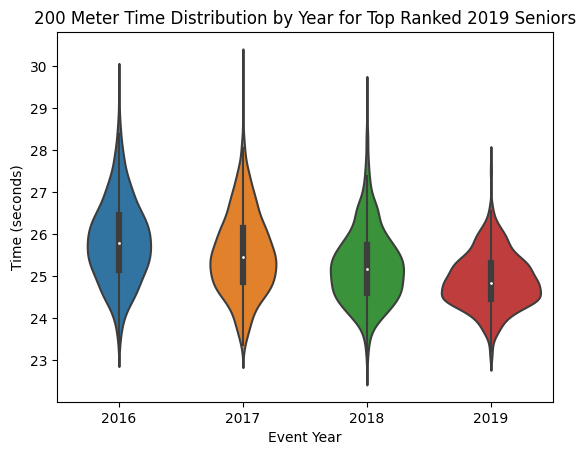

In [71]:
# prompt: show a violin graph of the Time value from df_event_with_athlete_2019_200Meters grouped by EventYear

ax = sns.violinplot(x="EventYear", y="Time", data=df_event_with_athlete_2019_200Meters)
ax.set_title("200 Meter Time Distribution by Year for Top Ranked 2019 Seniors")
ax.set_xlabel("Event Year")
ax.set_ylabel("Time (seconds)")

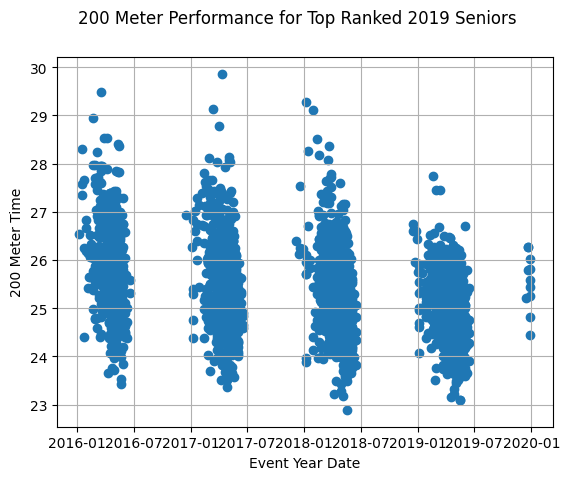

In [72]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters['EventDateTime'], df_event_with_athlete_2019_200Meters['Time'])


ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Seniors')

ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")


plt.show()


In [73]:
# only look at 12th grade and in 2019 (there were some records from 2020)

df_event_with_athlete_2019_200Meters_12th = df_event_with_athlete_2019_200Meters[(df_event_with_athlete_2019_200Meters["StudentGrade"] == "12th") & (df_event_with_athlete_2019_200Meters["EventDateTime"] < datetime(2019, 7, 1)) & (df_event_with_athlete_2019_200Meters["EventDateTime"] > datetime(2018, 10, 1))]

In [74]:
df_event_with_athlete_2019_200Meters_12th["EventDateTime"].sort_values().head(100)

1440    2019-01-03
6640    2019-01-05
5896    2019-01-05
3780    2019-01-05
20      2019-01-05
           ...    
11603   2019-03-06
2742    2019-03-07
3117    2019-03-07
5749    2019-03-07
7110    2019-03-07
Name: EventDateTime, Length: 100, dtype: datetime64[ns]

https://www.statology.org/matplotlib-trendline/

In [75]:
df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)

5        1555718400000000000
6        1557273600000000000
7        1558137600000000000
8        1558742400000000000
9        1558742400000000000
                ...         
11939    1555459200000000000
11940    1555459200000000000
11941    1556323200000000000
11942    1556323200000000000
11943    1556928000000000000
Name: EventDateTime, Length: 790, dtype: int64

In [76]:
z = np.polyfit(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th['Time'], 1)
p = np.poly1d(z)

In [77]:
df_event_with_athlete_2019_200Meters_12th

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
5,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,5,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,Joseph Kellerman Invitational,V F,13,2019,Outdoor,12th,23.72,Other,tdoor Girard College 19 12th Gra,2019-04-20
6,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,6,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,Penn-Jersey Athletic League Championships,V F,13,2019,Outdoor,12th,24.94,Other,tdoor Girard College 19 12th Gra,2019-05-08
7,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,7,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,PIAA District 1 AA Championships,V F,13,2019,Outdoor,12th,24.45,Other,tdoor Girard College 19 12th Gra,2019-05-18
8,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,8,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,PIAA State Championships,V S,13,2019,Outdoor,12th,24.35,Other,tdoor Girard College 19 12th Gra,2019-05-25
9,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,9,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,PIAA State Championships,V P,13,2019,Outdoor,12th,24.03,Other,tdoor Girard College 19 12th Gra,2019-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN,11947,https://www.athletic.net/athlete/10958613/trac...,200 Meters,...,FHSAA 4A District 16,V P,13,2019,Outdoor,12th,24.87,Other,tdoor Miami Southridge 12th Gra,2019-04-17
11940,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN,11948,https://www.athletic.net/athlete/10958613/trac...,200 Meters,...,FHSAA 4A District 16,V F,13,2019,Outdoor,12th,24.80,Other,tdoor Miami Southridge 12th Gra,2019-04-17
11941,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN,11949,https://www.athletic.net/athlete/10958613/trac...,200 Meters,...,FHSAA 4A Regional 4 & 1A Regional 4,V P,13,2019,Outdoor,12th,25.21,Other,tdoor Miami Southridge 12th Gra,2019-04-27
11942,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN,11950,https://www.athletic.net/athlete/10958613/trac...,200 Meters,...,FHSAA 4A Regional 4 & 1A Regional 4,V F,13,2019,Outdoor,12th,25.31,Other,tdoor Miami Southridge 12th Gra,2019-04-27


In [78]:
df_event_with_athlete_2019_200Meters_12th['SeasonName'].value_counts()

Outdoor    706
Indoor      84
Name: SeasonName, dtype: int64

(22.0, 30.0)

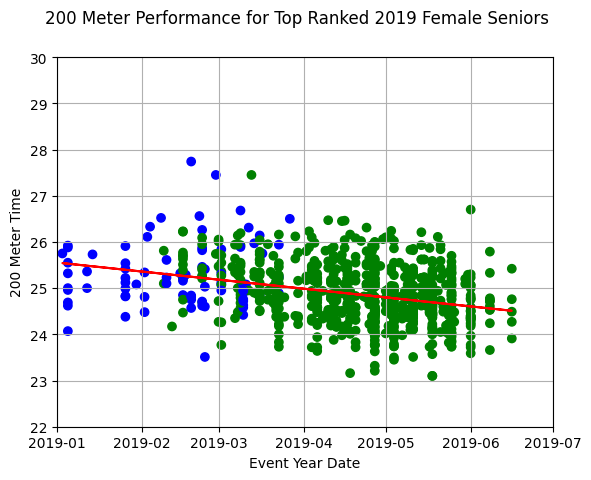

In [79]:
fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th['EventDateTime'], df_event_with_athlete_2019_200Meters_12th['Time'], c=list(df_event_with_athlete_2019_200Meters_12th['SeasonName'].map(colors)))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Female Seniors')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(22, 30)


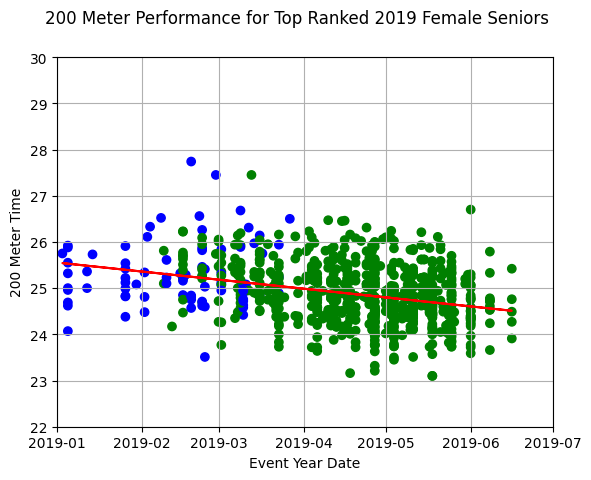

In [80]:
fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th['EventDateTime'], df_event_with_athlete_2019_200Meters_12th['Time'], c=list(df_event_with_athlete_2019_200Meters_12th['SeasonName'].map(colors)))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Female Seniors')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(22, 30)

plt.show()

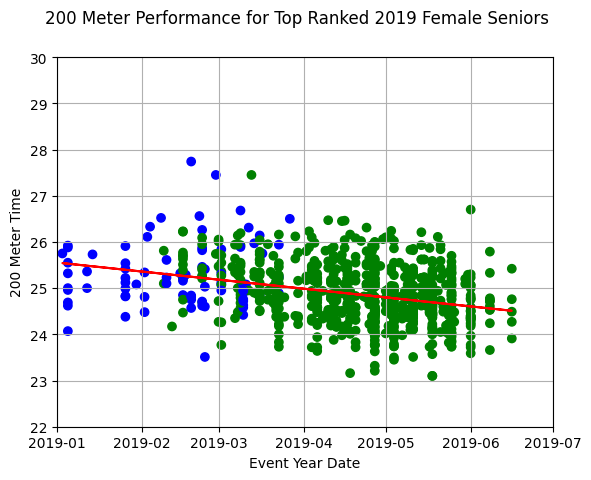

In [81]:


fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th['EventDateTime'], df_event_with_athlete_2019_200Meters_12th['Time'], c=df_event_with_athlete_2019_200Meters_12th['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Female Seniors')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(22, 30)

plt.show()


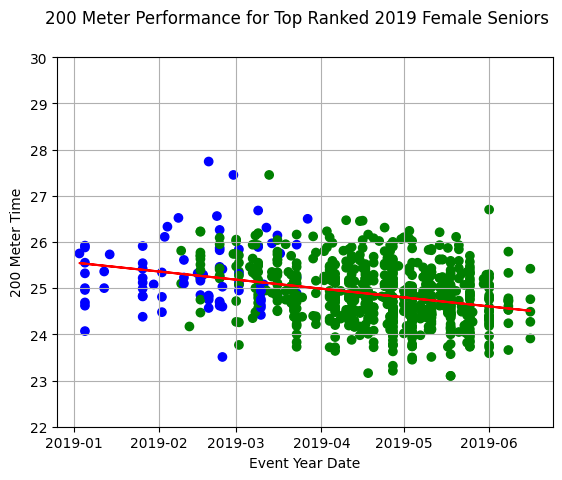

In [82]:
fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th['EventDateTime'], df_event_with_athlete_2019_200Meters_12th['Time'], c=df_event_with_athlete_2019_200Meters_12th['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Female Seniors')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.ylim(22, 30)

plt.show()

#### fit a line with GLM



In [83]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
len(df_event_with_athlete_2019_200Meters_12th["Athlete"].unique())

101

In [85]:
df_event_with_athlete_2019_200Meters_12th_forfit = df_event_with_athlete_2019_200Meters_12th[["EventDateTime",'Time']]
df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"] = df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTime"].astype(int)

<ipython-input-85-b949067ae9e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"] = df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTime"].astype(int)


In [86]:
# 1000000000 is seconds
# 60*60*24 gives days
df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"] = (df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"])/(1000000000*60*60*24)

<ipython-input-86-837283776f9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"] = (df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"])/(1000000000*60*60*24)


In [87]:
mod2019 = smf.ols(formula='Time ~ EventDateTimeInt', data=df_event_with_athlete_2019_200Meters_12th_forfit)
mod2019 = mod2019.fit()
print(mod2019.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     94.97
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           2.90e-21
Time:                        19:42:42   Log-Likelihood:                -727.04
No. Observations:                 790   AIC:                             1458.
Df Residuals:                     788   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          138.1070     11.618  

### 2019 full season with trend line

In [88]:
z = np.polyfit(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th['Time'], 3)
p = np.poly1d(z)

In [89]:
p

poly1d([ 1.39740724e-48, -6.51529930e-30,  1.01255824e-11, -5.24539063e+06])

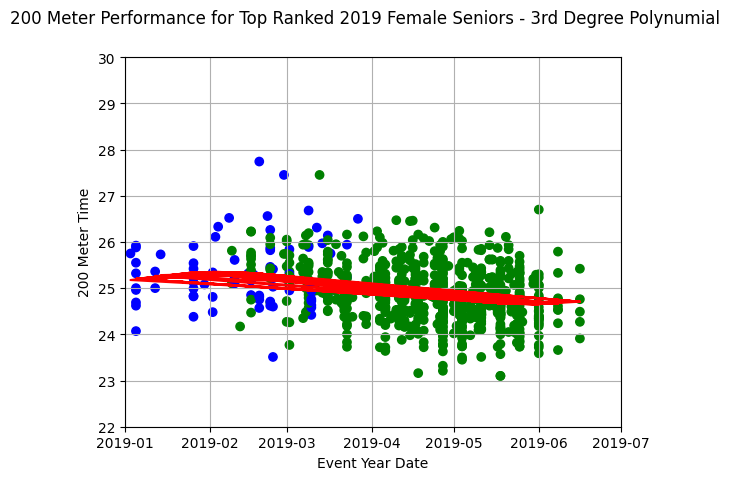

In [90]:

fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th['EventDateTime'], df_event_with_athlete_2019_200Meters_12th['Time'], c=df_event_with_athlete_2019_200Meters_12th['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Female Seniors - 3rd Degree Polynumial')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(22, 30)

plt.show()

### 2019 - single trend line for outdoor and indoor, cut off at 03/15

In [91]:
df_event_with_athlete_2019_200Meters_12th_to315 = df_event_with_athlete_2019_200Meters_12th[df_event_with_athlete_2019_200Meters_12th["EventDateTime"] < datetime(2019,3,15)]

In [92]:
z = np.polyfit(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th_to315['Time'], 2)
p = np.poly1d(z)

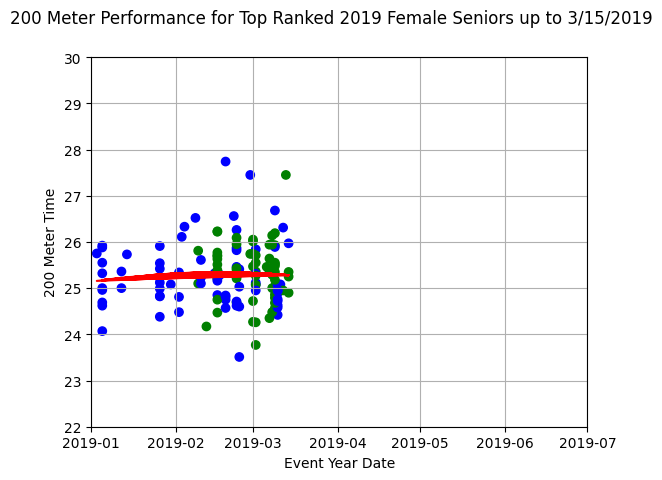

In [93]:

fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th_to315['EventDateTime'], df_event_with_athlete_2019_200Meters_12th_to315['Time'], c=df_event_with_athlete_2019_200Meters_12th_to315['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Female Seniors up to 3/15/2019')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(22, 30)

plt.show()


#### fit a line with GLM

In [94]:
df_event_with_athlete_2019_200Meters_12th_to315_forfit = df_event_with_athlete_2019_200Meters_12th_to315[["EventDateTime",'Time']]
df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"] = df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTime"].astype(int)

<ipython-input-94-3a32b6e5ce30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"] = df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTime"].astype(int)


In [95]:
df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"] = (df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"])/(1000000000*60*60*24)

<ipython-input-95-17ff4269dadb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"] = (df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"])/(1000000000*60*60*24)


In [96]:
mod2019 = smf.ols(formula='Time ~ EventDateTimeInt', data=df_event_with_athlete_2019_200Meters_12th_to315_forfit)
mod2019 = mod2019.fit()
print(mod2019.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1990
Date:                Sat, 11 Nov 2023   Prob (F-statistic):              0.656
Time:                        19:42:43   Log-Likelihood:                -139.55
No. Observations:                 138   AIC:                             283.1
Df Residuals:                     136   BIC:                             288.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2785     53.864  

### 2019 - combined outdoor and indoor with a separate trend line for each

In [97]:
df_event_with_athlete_2019_200Meters_12th_to315_outdoor = df_event_with_athlete_2019_200Meters_12th[(df_event_with_athlete_2019_200Meters_12th["EventDateTime"] < datetime(2019,3,15)) & (df_event_with_athlete_2019_200Meters_12th["SeasonName"] == "Outdoor")]

In [98]:
df_event_with_athlete_2019_200Meters_12th_to315_indoor = df_event_with_athlete_2019_200Meters_12th[(df_event_with_athlete_2019_200Meters_12th["EventDateTime"] < datetime(2019,3,15)) & (df_event_with_athlete_2019_200Meters_12th["SeasonName"] == "Indoor")]

In [99]:
z_outdoor = np.polyfit(df_event_with_athlete_2019_200Meters_12th_to315_outdoor["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th_to315_outdoor['Time'], 2)
p_outdoor = np.poly1d(z_outdoor)

In [100]:
z_indoor = np.polyfit(df_event_with_athlete_2019_200Meters_12th_to315_indoor["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th_to315_indoor['Time'], 2)
p_indoor = np.poly1d(z_indoor)

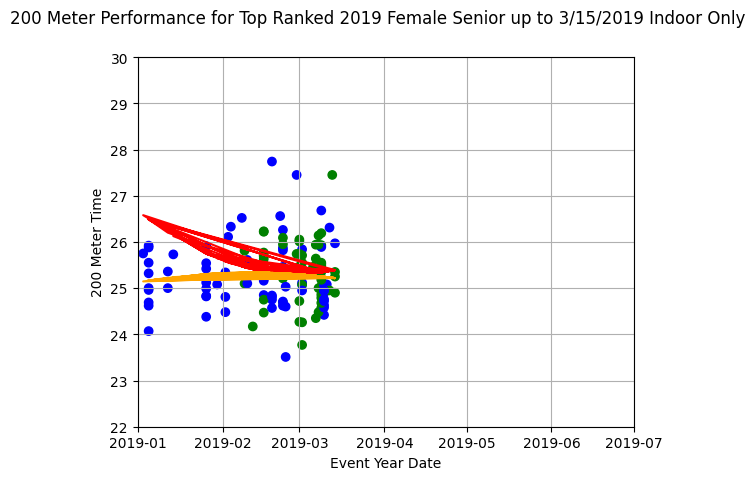

In [101]:

fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th_to315['EventDateTime'], df_event_with_athlete_2019_200Meters_12th_to315['Time'], c=df_event_with_athlete_2019_200Meters_12th_to315['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Female Senior up to 3/15/2019 Indoor Only')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"], p_outdoor(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"].astype(int)), color='red')
plt.plot(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"], p_indoor(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"].astype(int)), color='orange')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(22, 30)

plt.show()


## 2020 Data

In [102]:
df_event_with_athlete_2020 = df_event_with_athlete[(df_event_with_athlete["RankYear"] == 2020) & (df_event_with_athlete["EventYear"].isin([2020, 2019, 2018, 2017]))]

In [103]:
df_pivot = df_event_with_athlete_2020.pivot_table(values="Event", index="EventYear", columns="StudentGrade",  aggfunc="count")
df_pivot

StudentGrade,10th,11th,12th,9th
EventYear,,,,
2017,NaN,NaN,NaN,1643.0
2018,2124.0,NaN,NaN,19.0
2019,14.0,2331.0,NaN,NaN
2020,NaN,2.0,957.0,NaN


In [104]:
df_event_with_athlete_2020_200Meters = df_event_with_athlete_2020[df_event_with_athlete_2020["Event"] == "200 Meters"]

In [105]:
df_event_with_athlete_2020_200Meters[df_event_with_athlete_2020_200Meters["Time"]> 30]

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
13424,NaN,18.0,12,Rihana Gray,https://www.athletic.net/athlete/11601817/trac...,2020,No,13453,https://www.athletic.net/athlete/11601817/trac...,200 Meters,...,Dallas Lincoln HS 23rd Lewis Invitational,Var F,13,2018,Outdoor,10th,31.42,Other,tdoor Dallas Jefferson 16 10th Gra,2018-02-24
13831,NaN,NaN,12,Jaliyah Jackson,https://www.athletic.net/athlete/11020547/trac...,2020,No,13868,https://www.athletic.net/athlete/11020547/trac...,200 Meters,...,Lubbock Invitational (F-Sa),V P,13,2018,Outdoor,10th,30.99,Other,tdoor Wolfforth Frenship 10th Gra,2018-03-31


In [106]:
df_event_with_athlete_2020_200Meters = df_event_with_athlete_2020_200Meters[df_event_with_athlete_2020_200Meters["Time"]< 30]

### 2020 grades - violin by year

Text(0, 0.5, 'Time (seconds)')

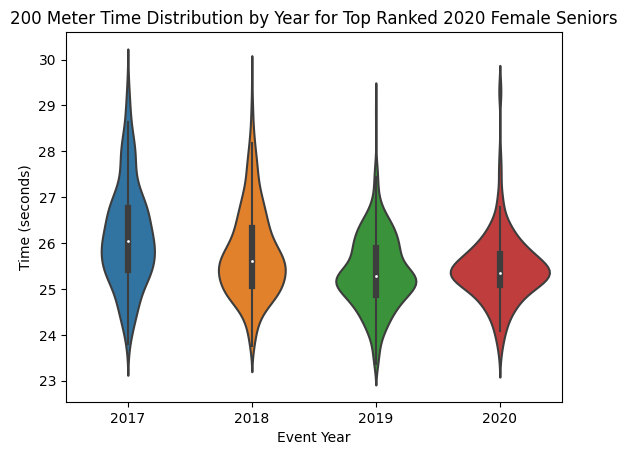

In [107]:
ax = sns.violinplot(x="EventYear", y="Time", data=df_event_with_athlete_2020_200Meters)
ax.set_title("200 Meter Time Distribution by Year for Top Ranked 2020 Female Seniors")
ax.set_xlabel("Event Year")
ax.set_ylabel("Time (seconds)")

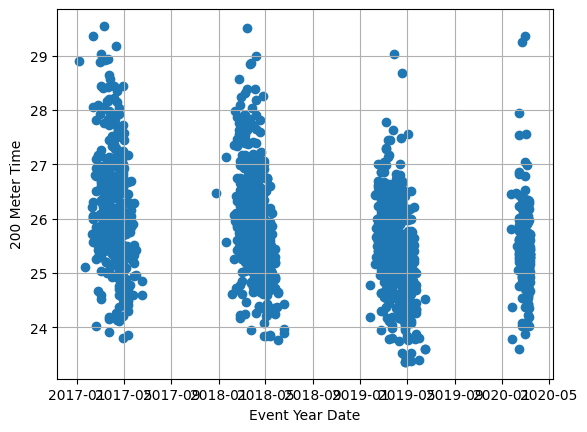

In [108]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_event_with_athlete_2020_200Meters['EventDateTime'], df_event_with_athlete_2020_200Meters['Time'])

ax.grid(True)

#plt.title("2019 - 100 Meters vs 200 Meters")

ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")


plt.show()

### 2020 with trend line

In [109]:
# only look at 12th grade and in 2019 (there were some records from 2020)

df_event_with_athlete_2020_200Meters_12th = df_event_with_athlete_2020_200Meters[(df_event_with_athlete_2020_200Meters["StudentGrade"] == "12th") & (df_event_with_athlete_2020_200Meters["EventDateTime"] < datetime(2020, 7, 1))]

In [110]:
z = np.polyfit(df_event_with_athlete_2020_200Meters_12th["EventDateTime"].astype(int),  df_event_with_athlete_2020_200Meters_12th['Time'], 1)
p = np.poly1d(z)

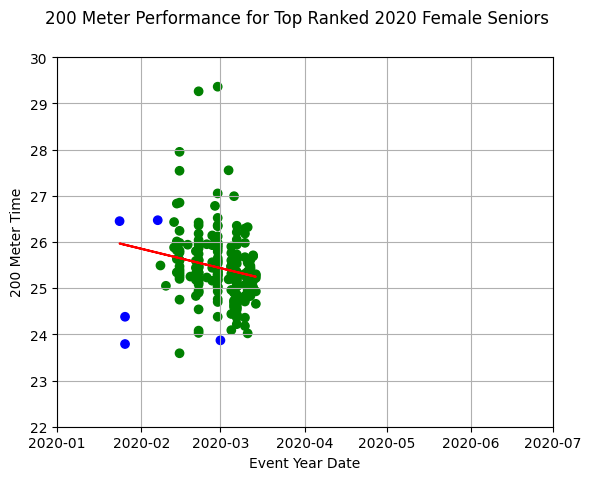

In [111]:


fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2020_200Meters_12th['EventDateTime'], df_event_with_athlete_2020_200Meters_12th['Time'], c=df_event_with_athlete_2020_200Meters_12th['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2020 Female Seniors')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")


plt.plot(df_event_with_athlete_2020_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2020_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2020,1,1), datetime(2020,7,1))
plt.ylim(22, 30)

plt.show()

#### use glm to fit a model - 2020

In [112]:
df_event_with_athlete_2020_200Meters_12th_forfit = df_event_with_athlete_2020_200Meters_12th[["EventDateTime",'Time']]
df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"] = df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTime"].astype(int)

<ipython-input-112-107c3a2b5568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"] = df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTime"].astype(int)


In [113]:
df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"]

11982    1581724800000000000
11983    1582329600000000000
12081    1579996800000000000
12082    1579996800000000000
12083    1583020800000000000
                ...         
19002    1581724800000000000
19007    1583971200000000000
19093    1583539200000000000
19152    1583539200000000000
19218    1581638400000000000
Name: EventDateTimeInt, Length: 216, dtype: int64

In [114]:
# from datetime import datetime

# # current date and time
# now = datetime.now()
# print('Date and Time is:', now)

# timestamp = datetime.timestamp(now)
# print("timestamp =", timestamp)

In [115]:
# import datetime as dt
# from datetime import datetime
# datetime20200101 = dt.datetime(2020, 2, 29)

In [116]:
# s = "01 January 2020"
# datetime20200101 = datetime.strptime(s, "%d %B %Y")

In [117]:
# datetime20200101

In [118]:
# ts20200101 =  datetime.timestamp(datetime20200101)

In [119]:
# ts20200101

In [120]:
# 1000000000 is seconds
# 60*60*24 gives days
df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"] = (df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"])/(1000000000*60*60*24)

<ipython-input-120-58efc23bf46c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"] = (df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"])/(1000000000*60*60*24)


In [121]:
mod2020 = smf.ols(formula='Time ~ EventDateTimeInt', data=df_event_with_athlete_2020_200Meters_12th_forfit)
res2020 = mod2020.fit()
print(res2020.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     7.456
Date:                Sat, 11 Nov 2023   Prob (F-statistic):            0.00685
Time:                        19:42:46   Log-Likelihood:                -240.60
No. Observations:                 216   AIC:                             485.2
Df Residuals:                     214   BIC:                             491.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          289.2925     96.625  

# project the values for 2020 students

## Using the top scope for grapes 9-12

### find the top score by grade for the students
include only students who have an event in year year

In [122]:
df_event_with_athlete_2020_200Meters

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
11982,1.0,NaN,12,Jayla Hollis,https://www.athletic.net/athlete/21731967/trac...,2020,Yes,11990,https://www.athletic.net/athlete/21731967/trac...,200 Meters,...,Dallas Adams HS Cougar Relays,V F,13,2020,Outdoor,12th,23.59,Other,tdoor DeSoto 12th Gra,2020-02-15
11983,1.0,NaN,12,Jayla Hollis,https://www.athletic.net/athlete/21731967/trac...,2020,Yes,11991,https://www.athletic.net/athlete/21731967/trac...,200 Meters,...,DeSoto Nike Invitational,V F,13,2020,Outdoor,12th,24.03,Other,tdoor DeSoto 12th Gra,2020-02-22
11993,1.0,NaN,12,Jayla Hollis,https://www.athletic.net/athlete/21731967/trac...,2020,Yes,12001,https://www.athletic.net/athlete/21731967/trac...,200 Meters,...,DeSoto Nike Invitational,V F,13,2019,Outdoor,11th,23.95,Other,tdoor DeSoto 11th Gra,2019-02-23
11994,1.0,NaN,12,Jayla Hollis,https://www.athletic.net/athlete/21731967/trac...,2020,Yes,12002,https://www.athletic.net/athlete/21731967/trac...,200 Meters,...,Allen Eagle Relays,V F,13,2019,Outdoor,11th,24.29,Other,tdoor DeSoto 11th Gra,2019-03-01
11995,1.0,NaN,12,Jayla Hollis,https://www.athletic.net/athlete/21731967/trac...,2020,Yes,12003,https://www.athletic.net/athlete/21731967/trac...,200 Meters,...,Jesuit-Sheaner 55th Annual Relays,W P,13,2019,Outdoor,11th,24.04,Other,tdoor DeSoto 11th Gra,2019-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,295.0,NaN,12,Keaira Connor,https://www.athletic.net/athlete/11003400/trac...,2020,NaN,19278,https://www.athletic.net/athlete/11003400/trac...,200 Meters,...,Santa Fe Reggie Crosby Invitational,V F,13,2018,Outdoor,10th,26.24c,Other,tdoor Clear Brook 10th Gra,2018-03-02
19235,295.0,NaN,12,Keaira Connor,https://www.athletic.net/athlete/11003400/trac...,2020,NaN,19279,https://www.athletic.net/athlete/11003400/trac...,200 Meters,...,Goose Creek ISD Rockhold Relays,V P,13,2018,Outdoor,10th,25.44c,Other,tdoor Clear Brook 10th Gra,2018-03-29
19236,295.0,NaN,12,Keaira Connor,https://www.athletic.net/athlete/11003400/trac...,2020,NaN,19280,https://www.athletic.net/athlete/11003400/trac...,200 Meters,...,Goose Creek ISD Rockhold Relays,V F,13,2018,Outdoor,10th,26.24c,Other,tdoor Clear Brook 10th Gra,2018-03-29
19245,295.0,NaN,12,Keaira Connor,https://www.athletic.net/athlete/11003400/trac...,2020,NaN,19289,https://www.athletic.net/athlete/11003400/trac...,200 Meters,...,Baytown Rockhold Relays,V P,13,2017,Outdoor,9th,26.43,Other,tdoor Clear Brook 9th Gra,2017-03-31


In [123]:
df_event_with_athlete_2019_200Meters["EventYear"].value_counts()

2019    804
2018    701
2017    585
2016    476
Name: EventYear, dtype: int64

In [124]:
df_event_with_athlete_2020_200Meters_12th[df_event_with_athlete_2020_200Meters_12th["Time"].isna()]

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime


In [125]:
!pip install researchpy

In [126]:
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

In [127]:
df_event_with_athlete_2019_200Meters

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
5,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,5,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,Joseph Kellerman Invitational,V F,13,2019,Outdoor,12th,23.72,Other,tdoor Girard College 19 12th Gra,2019-04-20
6,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,6,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,Penn-Jersey Athletic League Championships,V F,13,2019,Outdoor,12th,24.94,Other,tdoor Girard College 19 12th Gra,2019-05-08
7,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,7,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,PIAA District 1 AA Championships,V F,13,2019,Outdoor,12th,24.45,Other,tdoor Girard College 19 12th Gra,2019-05-18
8,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,8,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,PIAA State Championships,V S,13,2019,Outdoor,12th,24.35,Other,tdoor Girard College 19 12th Gra,2019-05-25
9,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes,9,https://www.athletic.net/athlete/16309682/trac...,200 Meters,...,PIAA State Championships,V P,13,2019,Outdoor,12th,24.03,Other,tdoor Girard College 19 12th Gra,2019-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN,11972,https://www.athletic.net/athlete/10958613/trac...,200 Meters,...,FHSAA 4A Region 4,V P,13,2018,Outdoor,11th,25.10,Other,tdoor Miami Southridge 11th Gra,2018-04-26
11965,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN,11973,https://www.athletic.net/athlete/10958613/trac...,200 Meters,...,FHSAA 4A Region 4,V F,13,2018,Outdoor,11th,25.58,Other,tdoor Miami Southridge 11th Gra,2018-04-26
11966,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN,11974,https://www.athletic.net/athlete/10958613/trac...,200 Meters,...,FHSAA 4A State Track & Field Championships,V P,13,2018,Outdoor,11th,25.10,Other,tdoor Miami Southridge 11th Gra,2018-05-05
11979,297.0,NaN,12,Derricka Edwards,https://www.athletic.net/athlete/10958613/trac...,2019,NaN,11987,https://www.athletic.net/athlete/10958613/trac...,200 Meters,...,Hallandale All-Comers Meet,V F,13,2017,Outdoor,10th,27.81,Other,tdoor Miami Southridge 10th Gra,2017-02-11


In [128]:
df_best_times_2019_200Meter = df_event_with_athlete_2019_200Meters.groupby(["EventYear", "AtheleteLink"])["Time"].min().reset_index()

In [129]:
df_best_times_2019_200Meter

,EventYear,AtheleteLink,Time
0,2016,https://www.athletic.net/athlete/10282225/trac...,26.27
1,2016,https://www.athletic.net/athlete/10957476/trac...,24.11
2,2016,https://www.athletic.net/athlete/11048753/trac...,28.40
3,2016,https://www.athletic.net/athlete/11876181/trac...,25.76
4,2016,https://www.athletic.net/athlete/12043919/trac...,25.63
...,...,...,...
357,2019,https://www.athletic.net/athlete/9800778/track...,24.17
358,2019,https://www.athletic.net/athlete/9847887/track...,24.42
359,2019,https://www.athletic.net/athlete/9893820/track...,24.35
360,2019,https://www.athletic.net/athlete/9896596/track...,24.34


In [130]:
df_best_times_2019_200Meter_pivot= df_best_times_2019_200Meter.pivot_table(index="AtheleteLink", columns="EventYear", values="Time", aggfunc='first')

In [131]:
df_best_times_2019_200Meter_pivot.reset_index(inplace=True)

In [132]:
df_best_times_2019_200Meter_pivot

EventYear,AtheleteLink,2016,2017,2018,2019
0,https://www.athletic.net/athlete/10051916/trac...,NaN,24.84,24.05,24.06
1,https://www.athletic.net/athlete/10282225/trac...,26.27,26.01,24.86,24.22
2,https://www.athletic.net/athlete/10299182/trac...,NaN,25.56,NaN,24.41
3,https://www.athletic.net/athlete/10742198/trac...,NaN,24.60,24.17,24.26
4,https://www.athletic.net/athlete/10950209/trac...,NaN,25.21,25.35,24.33
...,...,...,...,...,...
98,https://www.athletic.net/athlete/9800778/track...,26.21,27.22,26.35,24.17
99,https://www.athletic.net/athlete/9847887/track...,26.66,25.05,24.70,24.42
100,https://www.athletic.net/athlete/9893820/track...,26.41,26.10,24.63,24.35
101,https://www.athletic.net/athlete/9896596/track...,24.41,24.06,24.15,24.34


In [133]:
df_best_times_2019_200Meter_pivot.columns

Index(['AtheleteLink', 2016, 2017, 2018, 2019], dtype='object', name='EventYear')

In [134]:
df_best_times_2019_200Meter_pivot[2016]

0        NaN
1      26.27
2        NaN
3        NaN
4        NaN
       ...  
98     26.21
99     26.66
100    26.41
101    24.41
102    24.74
Name: 2016, Length: 103, dtype: float64

In [135]:
df_best_times_2019_200Meter_pivot_nona = df_best_times_2019_200Meter_pivot[df_best_times_2019_200Meter_pivot[2016].notna() & df_best_times_2019_200Meter_pivot[2017].notna() & df_best_times_2019_200Meter_pivot[2018].notna() & df_best_times_2019_200Meter_pivot[2019].notna()]

In [136]:
df_best_times_2019_200Meter_pivot_nona

EventYear,AtheleteLink,2016,2017,2018,2019
1,https://www.athletic.net/athlete/10282225/trac...,26.27,26.01,24.86,24.22
5,https://www.athletic.net/athlete/10957476/trac...,24.11,24.11,23.65,23.83
14,https://www.athletic.net/athlete/11876181/trac...,25.76,25.65,24.50,24.42
15,https://www.athletic.net/athlete/12043919/trac...,25.63,24.82,24.14,24.59
16,https://www.athletic.net/athlete/12081170/trac...,25.26,25.00,24.67,24.45
...,...,...,...,...,...
97,https://www.athletic.net/athlete/9656438/track...,25.38,24.50,24.28,23.50
98,https://www.athletic.net/athlete/9800778/track...,26.21,27.22,26.35,24.17
99,https://www.athletic.net/athlete/9847887/track...,26.66,25.05,24.70,24.42
100,https://www.athletic.net/athlete/9893820/track...,26.41,26.10,24.63,24.35


In [137]:
#df_best_times_2019_200Meter_nona
df_best_times_2019_200Meter_nona = df_best_times_2019_200Meter_pivot_nona.melt(id_vars=['AtheleteLink'])
df_best_times_2019_200Meter_nona = df_best_times_2019_200Meter_nona.rename(columns={"value": "Time"})

In [138]:
# this has athletes with no missing values, but there are rows for each year instea of columns
df_best_times_2019_200Meter_nona

,AtheleteLink,EventYear,Time
0,https://www.athletic.net/athlete/10282225/trac...,2016,26.27
1,https://www.athletic.net/athlete/10957476/trac...,2016,24.11
2,https://www.athletic.net/athlete/11876181/trac...,2016,25.76
3,https://www.athletic.net/athlete/12043919/trac...,2016,25.63
4,https://www.athletic.net/athlete/12081170/trac...,2016,25.26
...,...,...,...
263,https://www.athletic.net/athlete/9656438/track...,2019,23.50
264,https://www.athletic.net/athlete/9800778/track...,2019,24.17
265,https://www.athletic.net/athlete/9847887/track...,2019,24.42
266,https://www.athletic.net/athlete/9893820/track...,2019,24.35


In [139]:
df_best_times_2019_200Meter_nona[["EventYear"]].describe().round(2).T

,count,unique,top,freq
EventYear,268,4,2016,67


In [140]:
df_best_times_2019_200Meter_nona[["Time"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Time,268.0,24.83,0.95,22.89,24.22,24.6,25.31,29.49


In [141]:
df_best_times_2019_200Meter_nona.to_csv("/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/BestTime2019.200Meter.Females.csv")

### apply linear model
https://disease-progression-modelling.github.io/pages/notebooks/disease_course_mapping/TP1_LMM.html

This seems very similar to LMM

https://gitlab.com/icm-institute/aramislab/leaspy/-/blob/master/leaspy/datasets/data/parkinson-putamen-train_and_test.csv?ref_type=heads
This has the data that was used with this notebook example. One concern is that they are developing models that do no support prodicting an individual who is not in the train dataset. E.g. they always include data for all individuals in train, which allows them to predict in test. But we want to prediect for individuals that are NOT in our train dataset.

#### full dataset

In [142]:
from scipy import stats

In [143]:
# https://stackoverflow.com/questions/53200129/attributeerror-float-object-has-no-attribute-shape-when-using-linregress
X = df_best_times_2019_200Meter_nona["EventYear"].astype(float)
y = df_best_times_2019_200Meter_nona["Time"]

In [144]:
print(type(X[0]))
print(type(y[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [145]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [146]:
print(slope, intercept, r_value, p_value, std_err)

-0.45352238805970135 939.808805970149 -0.5370767540524815 1.9876916071263315e-21 0.04367408641895258


In [147]:
df_best_times_2019_200Meter_nona["LR1"] = intercept + slope * df_best_times_2019_200Meter_nona['EventYear']

In [148]:
df_best_times_2019_200Meter_nona

,AtheleteLink,EventYear,Time,LR1
0,https://www.athletic.net/athlete/10282225/trac...,2016,26.27,25.507672
1,https://www.athletic.net/athlete/10957476/trac...,2016,24.11,25.507672
2,https://www.athletic.net/athlete/11876181/trac...,2016,25.76,25.507672
3,https://www.athletic.net/athlete/12043919/trac...,2016,25.63,25.507672
4,https://www.athletic.net/athlete/12081170/trac...,2016,25.26,25.507672
...,...,...,...,...
263,https://www.athletic.net/athlete/9656438/track...,2019,23.50,24.147104
264,https://www.athletic.net/athlete/9800778/track...,2019,24.17,24.147104
265,https://www.athletic.net/athlete/9847887/track...,2019,24.42,24.147104
266,https://www.athletic.net/athlete/9893820/track...,2019,24.35,24.147104


In [149]:
def compute_rmse(df, model_name):
    """Compute RMSE between Time column and the <model_name> column of df"""
    y = df['EventYear']
    y_hat = df[model_name]
    diff = y - y_hat
    return np.sqrt(np.mean(diff * diff))


In [150]:
compute_rmse(df_best_times_2019_200Meter_nona, "LR1")

1992.6732745952434

####  test/train split

In [151]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_best_times_2019_200Meter_nona, test_size=0.2)

In [152]:
#train_test_split.xs('test', level='SPLIT')

In [153]:
X = df_train["EventYear"].astype(float)
y = df_train["Time"]

In [154]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [155]:
df_best_times_2019_200Meter_nona["LR2"] = intercept + slope * df_best_times_2019_200Meter_nona['EventYear']

In [156]:
df_train["LR2"] = intercept + slope * df_train['EventYear']

In [157]:
df_test["LR2"] = intercept + slope * df_test['EventYear']

In [158]:
def compute_rmse_train_test(df_train, df_test, overall_results, model_name):
    """Inplace modification of <overall_results>"""
    overall_results.loc[model_name, 'train'] = compute_rmse(df_train, model_name)
    overall_results.loc[model_name, 'test'] = compute_rmse(df_test, model_name)

In [159]:
compute_rmse(df_best_times_2019_200Meter_nona, 'LR2')

1992.6330442829753

In [160]:
overall_results = pd.DataFrame({'train': [], 'test': []})


In [161]:
compute_rmse_train_test(df_train, df_test, overall_results, 'LR2')
overall_results

,train,test
LR2,1992.612151,1992.715842


###  individual linear regressions

In [162]:
#df_train.loc[147]['EventYear']

comments this out - this was unfinished

In [163]:
#stats.linregress(np.array(df_train.loc[147]['EventYear']), df_train.loc[147]['Time'])

In [164]:
# individual_parameters = pd.DataFrame({'INTERCEPT': [], 'SLOPE': []})

# subject_idx = 138

# def compute_individual_parameters(df, subject_idx):
#     df_patient = df[df['AtheleteLink'] == subject_idx]

#     x = df_patient['EventYear']
#     y = df_patient['Time']

#     # -- Linear regression
#     slope, intercept, _, _, _ = stats.linregress(x, y)


#     return intercept, slope


# individual_parameters.loc[subject_idx] = compute_individual_parameters(df_train, subject_idx)

# individual_parameters

### apply linear mixed effects model

####unscaled

In [165]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLMParams

In [166]:
df_mlm = df_best_times_2019_200Meter_nona[["AtheleteLink", "EventYear", "Time"]]
df_mlm["EventYear"] = df_mlm["EventYear"].astype(float)

<ipython-input-166-5ef66db278f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlm["EventYear"] = df_mlm["EventYear"].astype(float)


In [167]:
df_mlm

,AtheleteLink,EventYear,Time
0,https://www.athletic.net/athlete/10282225/trac...,2016.0,26.27
1,https://www.athletic.net/athlete/10957476/trac...,2016.0,24.11
2,https://www.athletic.net/athlete/11876181/trac...,2016.0,25.76
3,https://www.athletic.net/athlete/12043919/trac...,2016.0,25.63
4,https://www.athletic.net/athlete/12081170/trac...,2016.0,25.26
...,...,...,...
263,https://www.athletic.net/athlete/9656438/track...,2019.0,23.50
264,https://www.athletic.net/athlete/9800778/track...,2019.0,24.17
265,https://www.athletic.net/athlete/9847887/track...,2019.0,24.42
266,https://www.athletic.net/athlete/9893820/track...,2019.0,24.35


In [168]:
lmm = smf.mixedlm(formula='Time ~ 1 + EventYear',
                  data=df_mlm,
                  groups="AtheleteLink", re_formula="~ 1 + EventYear").fit()
lmm.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
=============================================================================
Model:                    MixedLM        Dependent Variable:        Time     
No. Observations:         268            Method:                    REML     
No. Groups:               67             Scale:                     0.3510   
Min. group size:          4              Log-Likelihood:            -292.0431
Max. group size:          4              Converged:                 Yes      
Mean group size:          4.0                                                
-----------------------------------------------------------------------------
                              Coef.   Std.Err.    z    P>|z|  [0.025  0.975] 
-----------------------------------------------------------------------------
Intercept                    939.809    65.301  14.392 0.000 811.821 1067.796
EventYear                     -0.454     0.032 -14.012 0.000  -0.517   -0.390
AtheleteLink Var               0.351 10178.687                               
AtheleteLink x EventYear Cov  -0.000     5.068                               
EventYear Var                  0.000     0.003                               
=============================================================================

"""

### scaled

In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
df_mlm["Time"]
#scale.fit_transform(df_mlm["Time"])
scale= StandardScaler()

In [171]:
# https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
df_temp_scaled = pd.DataFrame(scale.fit_transform(np.array(df_mlm[["Time", "EventYear"]]).reshape(-1,2)), columns=["Time", "EventYear"])

In [172]:

df_mlm_scaled = pd.DataFrame()
df_mlm_scaled["AtheleteLink"]= df_mlm["AtheleteLink"]
df_mlm_scaled["Time"] = df_temp_scaled["Time"]
df_mlm_scaled["EventYear"] =df_temp_scaled["EventYear"]



In [173]:
df_mlm_scaled.head()

,AtheleteLink,Time,EventYear
0,https://www.athletic.net/athlete/10282225/trac...,1.528031,-1.341641
1,https://www.athletic.net/athlete/10957476/trac...,-0.759866,-1.341641
2,https://www.athletic.net/athlete/11876181/trac...,0.987833,-1.341641
3,https://www.athletic.net/athlete/12043919/trac...,0.850136,-1.341641
4,https://www.athletic.net/athlete/12081170/trac...,0.458227,-1.341641


In [174]:
lmm = smf.mixedlm(formula='Time ~ 1 + EventYear',
                  data=df_mlm_scaled,
                  groups="AtheleteLink", re_formula="~ 1 + EventYear").fit()
lmm.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                   MixedLM      Dependent Variable:      Time     
No. Observations:        268          Method:                  REML     
No. Groups:              67           Scale:                   0.2889   
Min. group size:         4            Log-Likelihood:          -281.9651
Max. group size:         4            Converged:               Yes      
Mean group size:         4.0                                            
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     0.000    0.080   0.000 1.000 -0.156  0.156
EventYear                    -0.537    0.048 -11.298 0.000 -0.630 -0.444
AtheleteLink Var              0.352    0.168                            
AtheleteLink x EventYear Cov -0.167    0.079                            
EventYear Var                 0.079    0.060                            
========================================================================

"""

In [175]:
lmm.random_effects

{'https://www.athletic.net/athlete/10282225/track-and-field/high-school': AtheleteLink    0.488261
 EventYear      -0.231541
 dtype: float64,
 'https://www.athletic.net/athlete/10957476/track-and-field/high-school': AtheleteLink   -0.795439
 EventYear       0.377210
 dtype: float64,
 'https://www.athletic.net/athlete/11876181/track-and-field/high-school': AtheleteLink    0.213887
 EventYear      -0.101429
 dtype: float64,
 'https://www.athletic.net/athlete/12043919/track-and-field/high-school': AtheleteLink   -0.052862
 EventYear       0.025068
 dtype: float64,
 'https://www.athletic.net/athlete/12081170/track-and-field/high-school': AtheleteLink   -0.056669
 EventYear       0.026873
 dtype: float64,
 'https://www.athletic.net/athlete/12907674/track-and-field/high-school': AtheleteLink   -0.338794
 EventYear       0.160662
 dtype: float64,
 'https://www.athletic.net/athlete/14502600/track-and-field/high-school': AtheleteLink    1.720532
 EventYear      -0.815904
 dtype: float64,
 'http

In [176]:
df_random_effects = pd.DataFrame.from_dict(lmm.random_effects, orient='index')
df_random_effects = df_random_effects.rename({'AtheleteLink': 'Random intercept', 'EventYear': 'Random slope'}, axis=1)

df_random_effects['INTERCEPT'] = df_random_effects['Random intercept'] + lmm.fe_params.loc['Intercept']
df_random_effects['SLOPE'] = df_random_effects['Random slope'] + lmm.fe_params.loc['EventYear']

df_random_effects.head()

,Random intercept,Random slope,INTERCEPT,SLOPE
https://www.athletic.net/athlete/10282225/track-and-field/high-school,0.488261,-0.231541,0.488261,-0.768618
https://www.athletic.net/athlete/10957476/track-and-field/high-school,-0.795439,0.377210,-0.795439,-0.159867
https://www.athletic.net/athlete/11876181/track-and-field/high-school,0.213887,-0.101429,0.213887,-0.638505
https://www.athletic.net/athlete/12043919/track-and-field/high-school,-0.052862,0.025068,-0.052862,-0.512009
https://www.athletic.net/athlete/12081170/track-and-field/high-school,-0.056669,0.026873,-0.056669,-0.510203


# clustering

Frechet distance:
https://www.youtube.com/watch?v=tTOcEm2l5tI

https://shapely.readthedocs.io/en/stable/reference/shapely.frechet_distance.html#shapely.frechet_distance

https://www.youtube.com/watch?v=12vrDDBnEFg
this one is simpler. Shortest leash length
discrete - coupling between P and Q sequence. Minimal possible length of coupling
O(nm log(nm) or O(nm) for discrete


KNN with custom metrics
https://stackoverflow.com/questions/21052509/sklearn-knn-usage-with-a-user-defined-metric

https://www.rdocumentation.org/packages/kmlShape/versions/0.9.5/topics/kmlShape
previous paper used kmeans clustering

"This function run k-means for longitudinal data using some shape respecting distance and mean."

https://stackoverflow.com/questions/5529625/is-it-possible-to-specify-your-own-distance-function-using-scikit-learn-k-means
KMeans using a custom distance function

https://www.kaggle.com/code/arushchillar/kmeans-clustering-using-different-distance-metrics



# best times for each athlete over all seasons

## looking at event

looking at the values, the common single events are:
200 Meters
100 Meters
400 Meters
Long J

In [177]:
# prompt: get the list of distinct values and counts for the column Event in the dataframe df_athlete_event_clean

df_athelete_event_clean["Event"].value_counts()

200 Meters                          4377
100 Meters                          3642
4x100 Relay                         2344
400 Meters                          1931
4x400 Relay                         1764
4x200 Relay                         1299
Long Jump                            877
55 Meter Dash                        597
60 Meter Dash                        482
300 Meters                           319
100m Hurdles  - 33"                  264
High Jump                            239
Triple Jump                          231
300m Hurdles  - 30"                  160
55m Hurdles  - 33"                   104
200 Meters  - Relay Split             88
SMR 800m  - [100-100-200-400]         75
SMR 1600m  - [200-200-400-800]        74
800 Meters                            63
400 Meters  - Relay Split             59
500 Meters                            51
4x800 Relay                           48
400m Hurdles  - 30"                   34
Shot Put  - 4kg                       29
DMR 4000m  - [12

In [178]:
df_200_meter = df_athelete_event_clean.loc[df_athelete_event_clean['Event'] == "200 Meters"]

In [179]:
df_200_meter

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
5,5,https://www.athletic.net/athlete/16309682/trac...,200 Meters,1,23.72,Apr 20,Joseph Kellerman Invitational,V F,13,2019,Outdoor,12th,23.72,Other,tdoor Girard College 19 12th Gra,2019-04-20
6,6,https://www.athletic.net/athlete/16309682/trac...,200 Meters,1,24.94,May 8,Penn-Jersey Athletic League Championships,V F,13,2019,Outdoor,12th,24.94,Other,tdoor Girard College 19 12th Gra,2019-05-08
7,7,https://www.athletic.net/athlete/16309682/trac...,200 Meters,1,24.45,May 18,PIAA District 1 AA Championships,V F,13,2019,Outdoor,12th,24.45,Other,tdoor Girard College 19 12th Gra,2019-05-18
8,8,https://www.athletic.net/athlete/16309682/trac...,200 Meters,1,24.35,May 25,PIAA State Championships,V S,13,2019,Outdoor,12th,24.35,Other,tdoor Girard College 19 12th Gra,2019-05-25
9,9,https://www.athletic.net/athlete/16309682/trac...,200 Meters,1,24.03,May 25,PIAA State Championships,V P,13,2019,Outdoor,12th,24.03,Other,tdoor Girard College 19 12th Gra,2019-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19278,19278,https://www.athletic.net/athlete/11003400/trac...,200 Meters,1,26.24,Mar 2,Santa Fe Reggie Crosby Invitational,V F,13,2018,Outdoor,10th,26.24c,Other,tdoor Clear Brook 10th Gra,2018-03-02
19279,19279,https://www.athletic.net/athlete/11003400/trac...,200 Meters,4,25.44,Mar 29,Goose Creek ISD Rockhold Relays,V P,13,2018,Outdoor,10th,25.44c,Other,tdoor Clear Brook 10th Gra,2018-03-29
19280,19280,https://www.athletic.net/athlete/11003400/trac...,200 Meters,5,26.24,Mar 29,Goose Creek ISD Rockhold Relays,V F,13,2018,Outdoor,10th,26.24c,Other,tdoor Clear Brook 10th Gra,2018-03-29
19289,19289,https://www.athletic.net/athlete/11003400/trac...,200 Meters,9,26.43,Mar 31,Baytown Rockhold Relays,V P,13,2017,Outdoor,9th,26.43,Other,tdoor Clear Brook 9th Gra,2017-03-31


In [180]:
df_100_meter = df_athelete_event_clean.loc[df_athelete_event_clean['Event'] == "100 Meters"]

In [181]:
df_100_meter

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
0,0,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,12.26,May 8,Penn-Jersey Athletic League Championships,V F,13,2019,Outdoor,12th,12.26,Other,tdoor Girard College 19 12th Gra,2019-05-08
1,1,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.84,May 18,PIAA District 1 AA Championships,V F,13,2019,Outdoor,12th,11.84,Other,tdoor Girard College 19 12th Gra,2019-05-18
2,2,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,12.10,May 25,PIAA State Championships,V S,13,2019,Outdoor,12th,12.10,Other,tdoor Girard College 19 12th Gra,2019-05-25
3,3,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.88,May 25,PIAA State Championships,V P,13,2019,Outdoor,12th,11.88,Other,tdoor Girard College 19 12th Gra,2019-05-25
4,4,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.87,May 25,PIAA State Championships,V F,13,2019,Outdoor,12th,11.87,Other,tdoor Girard College 19 12th Gra,2019-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19261,19261,https://www.athletic.net/athlete/11003400/trac...,100 Meters,--,NaN,Mar 6,Clear Creek Ruben Jordan Classic,V F,13,2020,Outdoor,12th,NaN,Other,tdoor Clear Brook 12th Gra,2020-03-06
19274,19274,https://www.athletic.net/athlete/11003400/trac...,100 Meters,6,12.84,Mar 29,Goose Creek ISD Rockhold Relays,V P,13,2018,Outdoor,10th,12.84c,Other,tdoor Clear Brook 10th Gra,2018-03-29
19275,19275,https://www.athletic.net/athlete/11003400/trac...,100 Meters,4,12.64,Mar 29,Goose Creek ISD Rockhold Relays,V F,13,2018,Outdoor,10th,12.64cPR,Other,tdoor Clear Brook 10th Gra,2018-03-29
19287,19287,https://www.athletic.net/athlete/11003400/trac...,100 Meters,8,13.04,Feb 17,Nederland Bulldog Relays,V F,13,2017,Outdoor,9th,13.04c,Other,tdoor Clear Brook 9th Gra,2017-02-17


In [182]:
df_400_meter = df_athelete_event_clean.loc[df_athelete_event_clean['Event'] == "400 Meters"]

In [183]:
df_400_meter

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
121,121,https://www.athletic.net/athlete/9387401/track...,400 Meters,1,NaN,May 3,Central Suburban League - North Girls Champio...,V F,13,2019,Outdoor,12th,1:01.24PR,Other,tdoor Highland Park 18 12th Gra,2019-05-03
224,224,https://www.athletic.net/athlete/17546729/trac...,400 Meters,1,53.40,Apr 28,Liberty Bell Invitational,V P,13,2018,Outdoor,11th,53.40,Other,tdoor Denver East 17 11th Gra,2018-04-28
225,225,https://www.athletic.net/athlete/17546729/trac...,400 Meters,1,53.83,Apr 28,Liberty Bell Invitational,V F,13,2018,Outdoor,11th,53.83,Other,tdoor Denver East 17 11th Gra,2018-04-28
226,226,https://www.athletic.net/athlete/17546729/trac...,400 Meters,1,51.92,May 19,CHSAA 5A State Championships,1 P,13,2018,Outdoor,11th,51.92PR,Other,tdoor Denver East 17 11th Gra,2018-05-19
227,227,https://www.athletic.net/athlete/17546729/trac...,400 Meters,2,53.94,May 19,CHSAA 5A State Championships,1 F,13,2018,Outdoor,11th,53.94,Other,tdoor Denver East 17 11th Gra,2018-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,19231,https://www.athletic.net/athlete/11084135/trac...,400 Meters,5,59.55,Feb 2,AHSAA Indoor State Track & Field Championships,V F,12,2019,Indoor,11th,59.55,Other,door Calera 11th Gra,2019-02-02
19250,19250,https://www.athletic.net/athlete/11084135/trac...,400 Meters,9,NaN,Mar 24,Northridge-Jaguar Invitational,1 F,13,2018,Outdoor,10th,1:06.49,Other,tdoor Calera 10th Gra,2018-03-24
19251,19251,https://www.athletic.net/athlete/11084135/trac...,400 Meters,11,NaN,Apr 7,Spain Park Classic,V F,13,2018,Outdoor,10th,1:06.27,Other,tdoor Calera 10th Gra,2018-04-07
19252,19252,https://www.athletic.net/athlete/11084135/trac...,400 Meters,9,NaN,Apr 16,Shelby County Championships,V F,13,2018,Outdoor,10th,1:03.86,Other,tdoor Calera 10th Gra,2018-04-16


## get the top scores for athletes for high school events by athlete
look at 400, 200 and 100

In [184]:
df_our_events = df_athelete_event_clean.loc[(df_athelete_event_clean['Event'] == ("100 Meters")) | (df_athelete_event_clean['Event'] == ("200 Meters")) | (df_athelete_event_clean['Event'] == "400 Meters")]
df_our_events["Event"].value_counts()



200 Meters    4377
100 Meters    3642
400 Meters    1931
Name: Event, dtype: int64

In [185]:
len(df_our_events)

9950

In [186]:
df_our_events

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,SeasonEndIndex,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
0,0,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,12.26,May 8,Penn-Jersey Athletic League Championships,V F,13,2019,Outdoor,12th,12.26,Other,tdoor Girard College 19 12th Gra,2019-05-08
1,1,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.84,May 18,PIAA District 1 AA Championships,V F,13,2019,Outdoor,12th,11.84,Other,tdoor Girard College 19 12th Gra,2019-05-18
2,2,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,12.10,May 25,PIAA State Championships,V S,13,2019,Outdoor,12th,12.10,Other,tdoor Girard College 19 12th Gra,2019-05-25
3,3,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.88,May 25,PIAA State Championships,V P,13,2019,Outdoor,12th,11.88,Other,tdoor Girard College 19 12th Gra,2019-05-25
4,4,https://www.athletic.net/athlete/16309682/trac...,100 Meters,1,11.87,May 25,PIAA State Championships,V F,13,2019,Outdoor,12th,11.87,Other,tdoor Girard College 19 12th Gra,2019-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19280,19280,https://www.athletic.net/athlete/11003400/trac...,200 Meters,5,26.24,Mar 29,Goose Creek ISD Rockhold Relays,V F,13,2018,Outdoor,10th,26.24c,Other,tdoor Clear Brook 10th Gra,2018-03-29
19287,19287,https://www.athletic.net/athlete/11003400/trac...,100 Meters,8,13.04,Feb 17,Nederland Bulldog Relays,V F,13,2017,Outdoor,9th,13.04c,Other,tdoor Clear Brook 9th Gra,2017-02-17
19288,19288,https://www.athletic.net/athlete/11003400/trac...,100 Meters,4,13.14,Feb 23,Porter Spartan Relays,V F,13,2017,Outdoor,9th,13.14c,Other,tdoor Clear Brook 9th Gra,2017-02-23
19289,19289,https://www.athletic.net/athlete/11003400/trac...,200 Meters,9,26.43,Mar 31,Baytown Rockhold Relays,V P,13,2017,Outdoor,9th,26.43,Other,tdoor Clear Brook 9th Gra,2017-03-31


In [187]:
# remove the rows with empty times
df_our_events = df_our_events[df_our_events["Time"].notna()]


In [188]:
# prompt: get count of distinct values of df_our_events["SchoolLevel"]
# this includes only high school events


df_our_events["SchoolLevel"].value_counts()

Other    9125
Name: SchoolLevel, dtype: int64

In [189]:
# prompt: find the lowest TIme value grouped by Event and AthleteLink and convert to a dataframe

df_best_times = df_our_events.groupby(["Event", "AtheleteLink"])["Time"].min().reset_index()


In [190]:
df_best_times.columns

Index(['Event', 'AtheleteLink', 'Time'], dtype='object')

In [191]:
df_best_times.dtypes

Event            object
AtheleteLink     object
Time            float64
dtype: object

In [192]:
len(df_best_times)

522

In [193]:
# prompt: get count of  distinct values for AtheleteLink

len(df_best_times["AtheleteLink"].unique())

208

this lines up with the number of athletes that we imported from the 2 spreadsheets - only missing athlete here (what happened?)

In [194]:
len(df_ranked_athletes_all["AthleteLink"].unique())

208

In [195]:
df_best_times.dtypes

Event            object
AtheleteLink     object
Time            float64
dtype: object

In [196]:
df_best_times_pivot= df_best_times.pivot_table(index="AtheleteLink", columns="Event", values="Time", aggfunc='first')


In [197]:
df_best_times_pivot.reset_index(inplace=True)

In [198]:
df_best_times_pivot

Event,AtheleteLink,100 Meters,200 Meters,400 Meters
0,https://www.athletic.net/athlete/10051916/trac...,11.54,24.05,NaN
1,https://www.athletic.net/athlete/10248653/trac...,11.93,25.29,58.82
2,https://www.athletic.net/athlete/10249001/trac...,11.48,23.59,58.28
3,https://www.athletic.net/athlete/10251638/trac...,12.53,25.48,57.55
4,https://www.athletic.net/athlete/10259884/trac...,12.03,24.78,NaN
...,...,...,...,...
203,https://www.athletic.net/athlete/9800778/track...,11.73,24.17,58.17
204,https://www.athletic.net/athlete/9847887/track...,12.03,24.42,56.34
205,https://www.athletic.net/athlete/9893820/track...,11.69,24.35,NaN
206,https://www.athletic.net/athlete/9896596/track...,12.05,24.06,54.74


In [199]:
df_best_times_pivot.columns

Index(['AtheleteLink', '100 Meters', '200 Meters', '400 Meters'], dtype='object', name='Event')

In [200]:
df_best_times_pivot

Event,AtheleteLink,100 Meters,200 Meters,400 Meters
0,https://www.athletic.net/athlete/10051916/trac...,11.54,24.05,NaN
1,https://www.athletic.net/athlete/10248653/trac...,11.93,25.29,58.82
2,https://www.athletic.net/athlete/10249001/trac...,11.48,23.59,58.28
3,https://www.athletic.net/athlete/10251638/trac...,12.53,25.48,57.55
4,https://www.athletic.net/athlete/10259884/trac...,12.03,24.78,NaN
...,...,...,...,...
203,https://www.athletic.net/athlete/9800778/track...,11.73,24.17,58.17
204,https://www.athletic.net/athlete/9847887/track...,12.03,24.42,56.34
205,https://www.athletic.net/athlete/9893820/track...,11.69,24.35,NaN
206,https://www.athletic.net/athlete/9896596/track...,12.05,24.06,54.74


# join the athlete best times to the athelete records

In [201]:
df_ranked_athletes_all

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
1,2.0,19.0,12,Thelma Davies,https://www.athletic.net/athlete/16309682/trac...,2019,Yes
4,5.0,18.0,12,Taylor Gilling,https://www.athletic.net/athlete/9387401/track...,2019,Yes
5,NaN,18.0,12,Arria Minor,https://www.athletic.net/athlete/17546729/trac...,2019,Yes
7,8.0,18.0,12,Rosey (Rosaline) Effiong,https://www.athletic.net/athlete/9326280/track...,2019,Yes
14,15.0,NaN,12,Jacious Sears,https://www.athletic.net/athlete/21732024/trac...,2019,Yes
...,...,...,...,...,...,...,...
286,287.0,NaN,12,Ken'naria Gadson,https://www.athletic.net/athlete/16410908/trac...,2020,Yes
290,NaN,18.0,12,Trenia Stephens,https://www.athletic.net/athlete/12061621/trac...,2020,Yes
292,NaN,NaN,12,Taylor Roache,https://www.athletic.net/athlete/11209451/trac...,2020,Yes
293,NaN,NaN,12,Nia Maye,https://www.athletic.net/athlete/11084135/trac...,2020,Yes


In [202]:
# prompt: find the row in df_ranked_athletes_all where AthleteLink value is https://www.athletic.net/athlete/10020150/track-and-field/high-school

pd.options.display.max_colwidth = 100
print(df_ranked_athletes_all[df_ranked_athletes_all["AthleteLink"].str.contains("10020150")]["AthleteLink"])

Series([], Name: AthleteLink, dtype: object)


In [203]:
pd.options.display.max_colwidth = 50

In [204]:
# prompt: join df_ranked_athletes_all to df_best_times_pivot using AtheleteLink and AthleteLink to join

df_athletes_best_times = pd.merge(df_ranked_athletes_all, df_best_times_pivot, how='right', left_on=['AthleteLink'], right_on=['AtheleteLink'])



In [205]:
df_athletes_best_times

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters
0,NaN,NaN,12,Kiana Foster,https://www.athletic.net/athlete/10051916/trac...,2019,Yes,https://www.athletic.net/athlete/10051916/trac...,11.54,24.05,NaN
1,NaN,18.0,12,Tay Peters,https://www.athletic.net/athlete/10248653/trac...,2020,Yes,https://www.athletic.net/athlete/10248653/trac...,11.93,25.29,58.82
2,80.0,18.0,12,Jazmine Hobson,https://www.athletic.net/athlete/10249001/trac...,2020,Yes,https://www.athletic.net/athlete/10249001/trac...,11.48,23.59,58.28
3,NaN,18.0,12,Latoria Robinson,https://www.athletic.net/athlete/10251638/trac...,2020,No,https://www.athletic.net/athlete/10251638/trac...,12.53,25.48,57.55
4,74.0,18.0,12,Synclair Savage,https://www.athletic.net/athlete/10259884/trac...,2020,Yes,https://www.athletic.net/athlete/10259884/trac...,12.03,24.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,12,Georgie McDevitt,https://www.athletic.net/athlete/9800778/track...,2019,Yes,https://www.athletic.net/athlete/9800778/track...,11.73,24.17,58.17
204,NaN,19.0,12,Leah Graybill,https://www.athletic.net/athlete/9847887/track...,2019,No,https://www.athletic.net/athlete/9847887/track...,12.03,24.42,56.34
205,NaN,18.0,12,Alyssa-Simone Robinson,https://www.athletic.net/athlete/9893820/track...,2019,Yes,https://www.athletic.net/athlete/9893820/track...,11.69,24.35,NaN
206,NaN,NaN,12,Mikeisha Covington,https://www.athletic.net/athlete/9896596/track...,2019,No,https://www.athletic.net/athlete/9896596/track...,12.05,24.06,54.74


In [206]:
df_athletes_best_times["100 Meters"] = df_athletes_best_times["100 Meters"].astype("float")
df_athletes_best_times["200 Meters"] = df_athletes_best_times["200 Meters"].astype("float")
df_athletes_best_times["400 Meters"] = df_athletes_best_times["400 Meters"].astype("float")

In [207]:
# prompt: rows in df_athletes_best_times where WentToDivITF is not Nan

df_athletes_best_times = df_athletes_best_times[df_athletes_best_times["WentToDivITF"].notna()]

In [208]:
df_athletes_best_times

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters
0,NaN,NaN,12,Kiana Foster,https://www.athletic.net/athlete/10051916/trac...,2019,Yes,https://www.athletic.net/athlete/10051916/trac...,11.54,24.05,NaN
1,NaN,18.0,12,Tay Peters,https://www.athletic.net/athlete/10248653/trac...,2020,Yes,https://www.athletic.net/athlete/10248653/trac...,11.93,25.29,58.82
2,80.0,18.0,12,Jazmine Hobson,https://www.athletic.net/athlete/10249001/trac...,2020,Yes,https://www.athletic.net/athlete/10249001/trac...,11.48,23.59,58.28
3,NaN,18.0,12,Latoria Robinson,https://www.athletic.net/athlete/10251638/trac...,2020,No,https://www.athletic.net/athlete/10251638/trac...,12.53,25.48,57.55
4,74.0,18.0,12,Synclair Savage,https://www.athletic.net/athlete/10259884/trac...,2020,Yes,https://www.athletic.net/athlete/10259884/trac...,12.03,24.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,12,Georgie McDevitt,https://www.athletic.net/athlete/9800778/track...,2019,Yes,https://www.athletic.net/athlete/9800778/track...,11.73,24.17,58.17
204,NaN,19.0,12,Leah Graybill,https://www.athletic.net/athlete/9847887/track...,2019,No,https://www.athletic.net/athlete/9847887/track...,12.03,24.42,56.34
205,NaN,18.0,12,Alyssa-Simone Robinson,https://www.athletic.net/athlete/9893820/track...,2019,Yes,https://www.athletic.net/athlete/9893820/track...,11.69,24.35,NaN
206,NaN,NaN,12,Mikeisha Covington,https://www.athletic.net/athlete/9896596/track...,2019,No,https://www.athletic.net/athlete/9896596/track...,12.05,24.06,54.74


In [209]:
# prompt: set df_athletes_best_times["WentToDivITF"] to upper case value and trim spaces

df_athletes_best_times["WentToDivITF"] = df_athletes_best_times["WentToDivITF"].str.upper().str.strip()


<ipython-input-209-9df4d3e8284d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_times["WentToDivITF"] = df_athletes_best_times["WentToDivITF"].str.upper().str.strip()


In [210]:
# prompt: unique values for WentToDivITF in df_athletes_best_times

df_athletes_best_times["WentToDivITF"].unique()

array(['YES', 'NO'], dtype=object)

### look at 100 meters times

In [211]:
df_athletes_best_100 = df_athletes_best_times[df_athletes_best_times["100 Meters"].notna()]

In [212]:
df_athletes_best_100

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters
0,NaN,NaN,12,Kiana Foster,https://www.athletic.net/athlete/10051916/trac...,2019,YES,https://www.athletic.net/athlete/10051916/trac...,11.54,24.05,NaN
1,NaN,18.0,12,Tay Peters,https://www.athletic.net/athlete/10248653/trac...,2020,YES,https://www.athletic.net/athlete/10248653/trac...,11.93,25.29,58.82
2,80.0,18.0,12,Jazmine Hobson,https://www.athletic.net/athlete/10249001/trac...,2020,YES,https://www.athletic.net/athlete/10249001/trac...,11.48,23.59,58.28
3,NaN,18.0,12,Latoria Robinson,https://www.athletic.net/athlete/10251638/trac...,2020,NO,https://www.athletic.net/athlete/10251638/trac...,12.53,25.48,57.55
4,74.0,18.0,12,Synclair Savage,https://www.athletic.net/athlete/10259884/trac...,2020,YES,https://www.athletic.net/athlete/10259884/trac...,12.03,24.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,12,Georgie McDevitt,https://www.athletic.net/athlete/9800778/track...,2019,YES,https://www.athletic.net/athlete/9800778/track...,11.73,24.17,58.17
204,NaN,19.0,12,Leah Graybill,https://www.athletic.net/athlete/9847887/track...,2019,NO,https://www.athletic.net/athlete/9847887/track...,12.03,24.42,56.34
205,NaN,18.0,12,Alyssa-Simone Robinson,https://www.athletic.net/athlete/9893820/track...,2019,YES,https://www.athletic.net/athlete/9893820/track...,11.69,24.35,NaN
206,NaN,NaN,12,Mikeisha Covington,https://www.athletic.net/athlete/9896596/track...,2019,NO,https://www.athletic.net/athlete/9896596/track...,12.05,24.06,54.74


In [213]:

df_athletes_best_100["100 Meters"] = df_athletes_best_100["100 Meters"].astype(float)



<ipython-input-213-815ae5865a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_100["100 Meters"] = df_athletes_best_100["100 Meters"].astype(float)


In [214]:
df_athletes_best_100["100 Meters"].mean()

12.02220430107527

In [215]:
# prompt: get the mean value for 100 Meters in df_athletes_best_100 grouped by WentToDIVITF

df_athletes_best_100.groupby(["WentToDivITF", "RankYear"])["100 Meters"].mean()

WentToDivITF  RankYear
NO            2019        11.928235
              2020        12.335758
YES           2019        11.849211
              2020        12.095500
Name: 100 Meters, dtype: float64

In [216]:
df_athletes_best_100

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters
0,NaN,NaN,12,Kiana Foster,https://www.athletic.net/athlete/10051916/trac...,2019,YES,https://www.athletic.net/athlete/10051916/trac...,11.54,24.05,NaN
1,NaN,18.0,12,Tay Peters,https://www.athletic.net/athlete/10248653/trac...,2020,YES,https://www.athletic.net/athlete/10248653/trac...,11.93,25.29,58.82
2,80.0,18.0,12,Jazmine Hobson,https://www.athletic.net/athlete/10249001/trac...,2020,YES,https://www.athletic.net/athlete/10249001/trac...,11.48,23.59,58.28
3,NaN,18.0,12,Latoria Robinson,https://www.athletic.net/athlete/10251638/trac...,2020,NO,https://www.athletic.net/athlete/10251638/trac...,12.53,25.48,57.55
4,74.0,18.0,12,Synclair Savage,https://www.athletic.net/athlete/10259884/trac...,2020,YES,https://www.athletic.net/athlete/10259884/trac...,12.03,24.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,12,Georgie McDevitt,https://www.athletic.net/athlete/9800778/track...,2019,YES,https://www.athletic.net/athlete/9800778/track...,11.73,24.17,58.17
204,NaN,19.0,12,Leah Graybill,https://www.athletic.net/athlete/9847887/track...,2019,NO,https://www.athletic.net/athlete/9847887/track...,12.03,24.42,56.34
205,NaN,18.0,12,Alyssa-Simone Robinson,https://www.athletic.net/athlete/9893820/track...,2019,YES,https://www.athletic.net/athlete/9893820/track...,11.69,24.35,NaN
206,NaN,NaN,12,Mikeisha Covington,https://www.athletic.net/athlete/9896596/track...,2019,NO,https://www.athletic.net/athlete/9896596/track...,12.05,24.06,54.74


<Axes: xlabel='WentToDivITF,RankYear'>

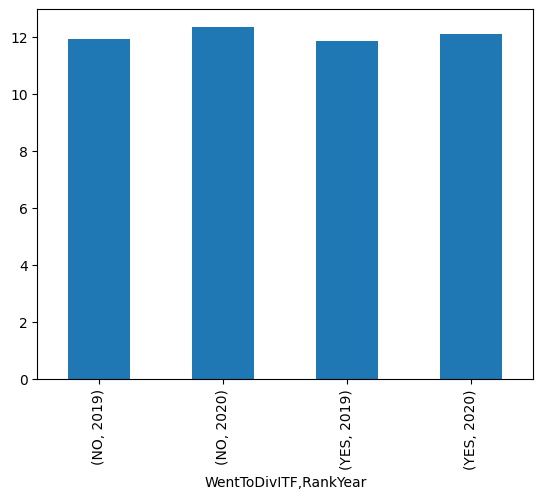

In [217]:
df_athletes_best_100.groupby(["WentToDivITF", "RankYear"])["100 Meters"].mean().plot(kind = "bar")

array([[<Axes: title={'center': '(NO, 2019)'}>,
        <Axes: title={'center': '(NO, 2020)'}>],
       [<Axes: title={'center': '(YES, 2019)'}>,
        <Axes: title={'center': '(YES, 2020)'}>]], dtype=object)

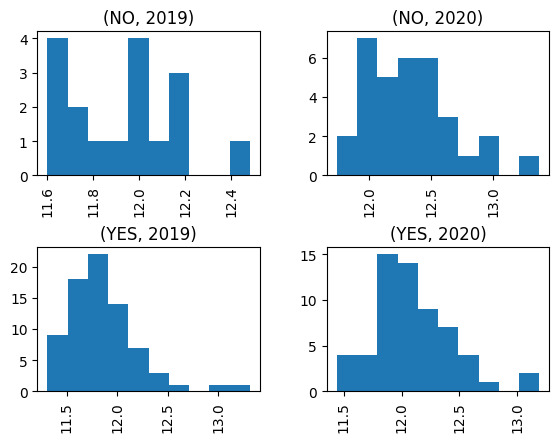

In [218]:
df_athletes_best_100.hist("100 Meters", by=["WentToDivITF", "RankYear"])

### look at 200 meter times

In [219]:
df_athletes_best_200 = df_athletes_best_times[df_athletes_best_times["200 Meters"].notna()]
df_athletes_best_200["200 Meters"] = df_athletes_best_200["200 Meters"].astype(float)
df_athletes_best_200["200 Meters"].mean()

24.447889447236175

In [220]:
df_athletes_best_200.groupby(["WentToDivITF", "RankYear"])["200 Meters"].mean()

WentToDivITF  RankYear
NO            2019        24.251765
              2020        24.916111
YES           2019        24.092073
              2020        24.692500
Name: 200 Meters, dtype: float64

array([[<Axes: title={'center': '(NO, 2019)'}>,
        <Axes: title={'center': '(NO, 2020)'}>],
       [<Axes: title={'center': '(YES, 2019)'}>,
        <Axes: title={'center': '(YES, 2020)'}>]], dtype=object)

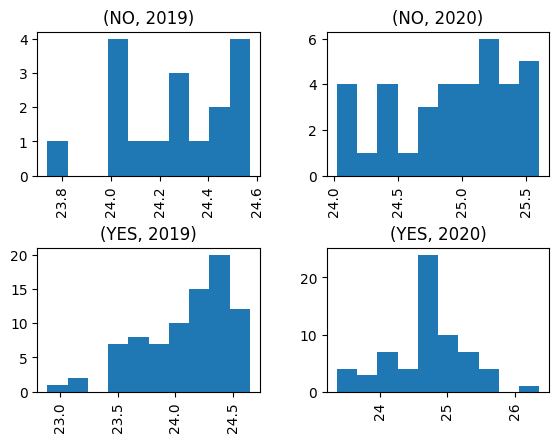

In [221]:
df_athletes_best_200.hist("200 Meters", by=["WentToDivITF", "RankYear"])

#### get the mean 200 meters score for 2019, 2020

In [222]:
df_athletes_best_200[df_athletes_best_200["RankYear"] == 2019].sort_values("200 Meters").head(50)["200 Meters"].mean()

23.838800000000003

In [223]:
df_athletes_best_200[df_athletes_best_200["RankYear"] == 2020].sort_values("200 Meters").head(50)["200 Meters"].mean()

24.356400000000004

### look at 400 meters

In [224]:
df_athletes_best_400 = df_athletes_best_times[df_athletes_best_times["400 Meters"].notna()]
df_athletes_best_400["400 Meters"] = df_athletes_best_400["400 Meters"].astype(float)
df_athletes_best_400["400 Meters"].mean()

<ipython-input-224-40094ba020a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_400["400 Meters"] = df_athletes_best_400["400 Meters"].astype(float)


56.500884955752205

In [225]:
df_athletes_best_400.groupby(["WentToDivITF", "RankYear"])["400 Meters"].mean()

WentToDivITF  RankYear
NO            2019        56.288571
              2020        57.627692
YES           2019        56.281579
              2020        56.482500
Name: 400 Meters, dtype: float64

array([[<Axes: title={'center': '(NO, 2019)'}>,
        <Axes: title={'center': '(NO, 2020)'}>],
       [<Axes: title={'center': '(YES, 2019)'}>,
        <Axes: title={'center': '(YES, 2020)'}>]], dtype=object)

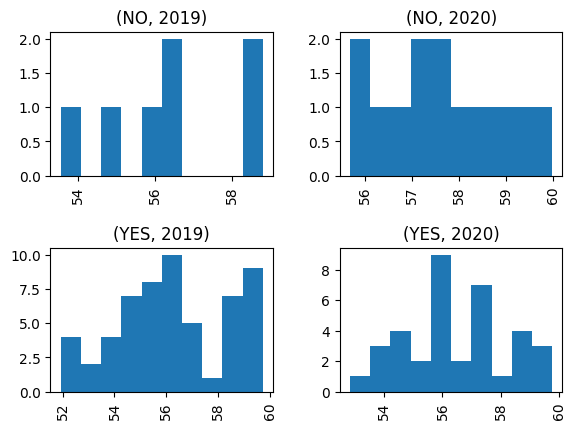

In [226]:
df_athletes_best_400.hist("400 Meters", by=["WentToDivITF", "RankYear"])

# build a model to predict DIVI based on times

In [227]:
# prompt: set the value of WentToDIVITFSimple equal to yes if WentToDIVITF is equal to YES

df_athletes_best_times["WentToDivITFSimple"] = df_athletes_best_times["WentToDivITF"].str.upper().str.strip() == "YES"
df_athletes_best_times["WentToDivITFSimple"] = df_athletes_best_times["WentToDivITFSimple"].astype(int)

<ipython-input-227-0058e6bff3ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_times["WentToDivITFSimple"] = df_athletes_best_times["WentToDivITF"].str.upper().str.strip() == "YES"
<ipython-input-227-0058e6bff3ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_times["WentToDivITFSimple"] = df_athletes_best_times["WentToDivITFSimple"].astype(int)


In [228]:
df_athletes_best_times

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters,WentToDivITFSimple
0,NaN,NaN,12,Kiana Foster,https://www.athletic.net/athlete/10051916/trac...,2019,YES,https://www.athletic.net/athlete/10051916/trac...,11.54,24.05,NaN,1
1,NaN,18.0,12,Tay Peters,https://www.athletic.net/athlete/10248653/trac...,2020,YES,https://www.athletic.net/athlete/10248653/trac...,11.93,25.29,58.82,1
2,80.0,18.0,12,Jazmine Hobson,https://www.athletic.net/athlete/10249001/trac...,2020,YES,https://www.athletic.net/athlete/10249001/trac...,11.48,23.59,58.28,1
3,NaN,18.0,12,Latoria Robinson,https://www.athletic.net/athlete/10251638/trac...,2020,NO,https://www.athletic.net/athlete/10251638/trac...,12.53,25.48,57.55,0
4,74.0,18.0,12,Synclair Savage,https://www.athletic.net/athlete/10259884/trac...,2020,YES,https://www.athletic.net/athlete/10259884/trac...,12.03,24.78,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,12,Georgie McDevitt,https://www.athletic.net/athlete/9800778/track...,2019,YES,https://www.athletic.net/athlete/9800778/track...,11.73,24.17,58.17,1
204,NaN,19.0,12,Leah Graybill,https://www.athletic.net/athlete/9847887/track...,2019,NO,https://www.athletic.net/athlete/9847887/track...,12.03,24.42,56.34,0
205,NaN,18.0,12,Alyssa-Simone Robinson,https://www.athletic.net/athlete/9893820/track...,2019,YES,https://www.athletic.net/athlete/9893820/track...,11.69,24.35,NaN,1
206,NaN,NaN,12,Mikeisha Covington,https://www.athletic.net/athlete/9896596/track...,2019,NO,https://www.athletic.net/athlete/9896596/track...,12.05,24.06,54.74,0


In [229]:
# prompt: get the rows from df_athletes_best_times where RankYear is 2019

df_athletes_best_times_2019 = df_athletes_best_times[df_athletes_best_times["RankYear"] == 2019]

In [230]:
df_athletes_best_times_2019.isnull().sum()

Rank                  67
Age                   49
Grade                  0
Athlete                0
AthleteLink            0
RankYear               0
WentToDivITF           0
AtheleteLink           0
100 Meters             6
200 Meters             0
400 Meters            35
WentToDivITFSimple     0
dtype: int64

<Axes: >

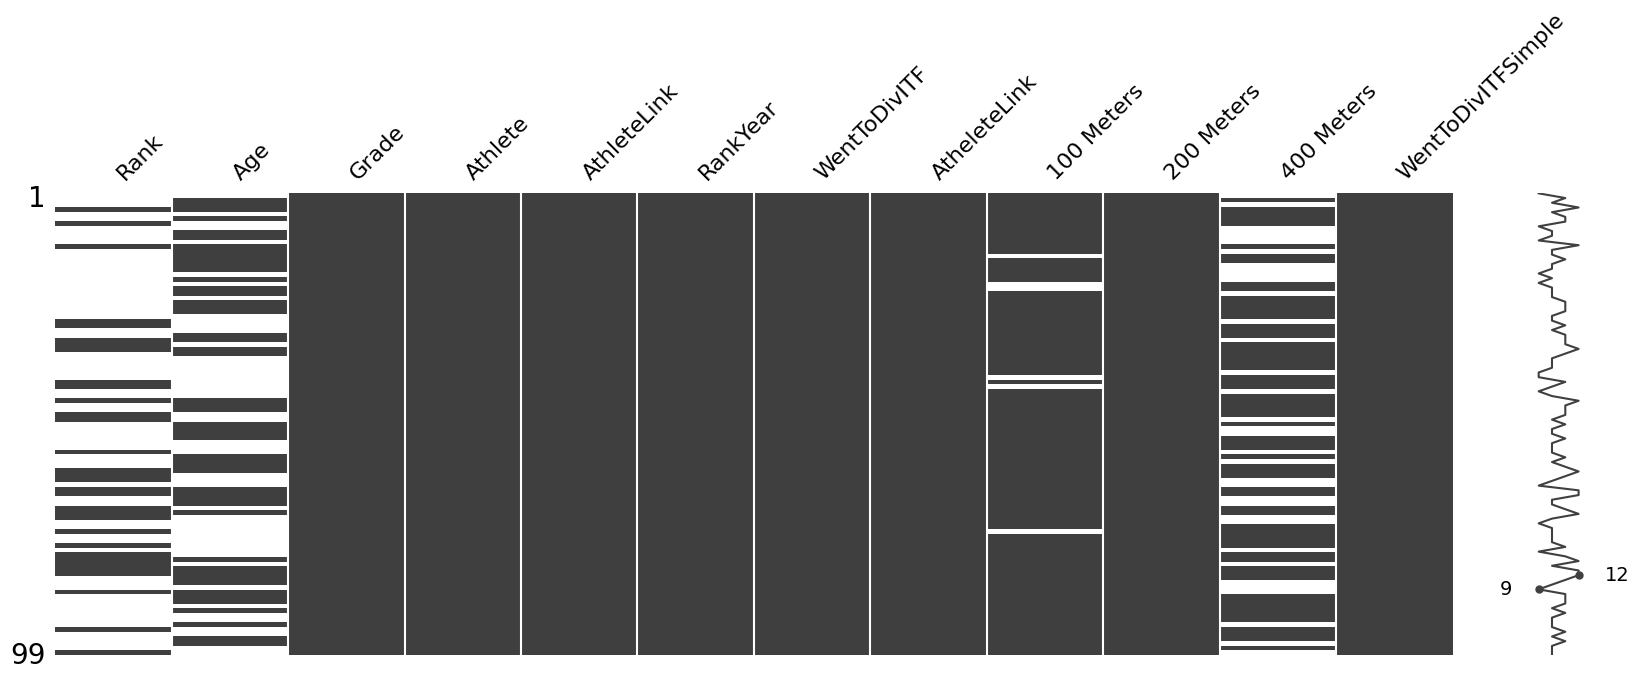

In [231]:
mno.matrix(df_athletes_best_times_2019, figsize = (20, 6))

In [232]:
df_athletes_best_times_2020 = df_athletes_best_times[df_athletes_best_times["RankYear"] == 2020]

<Axes: >

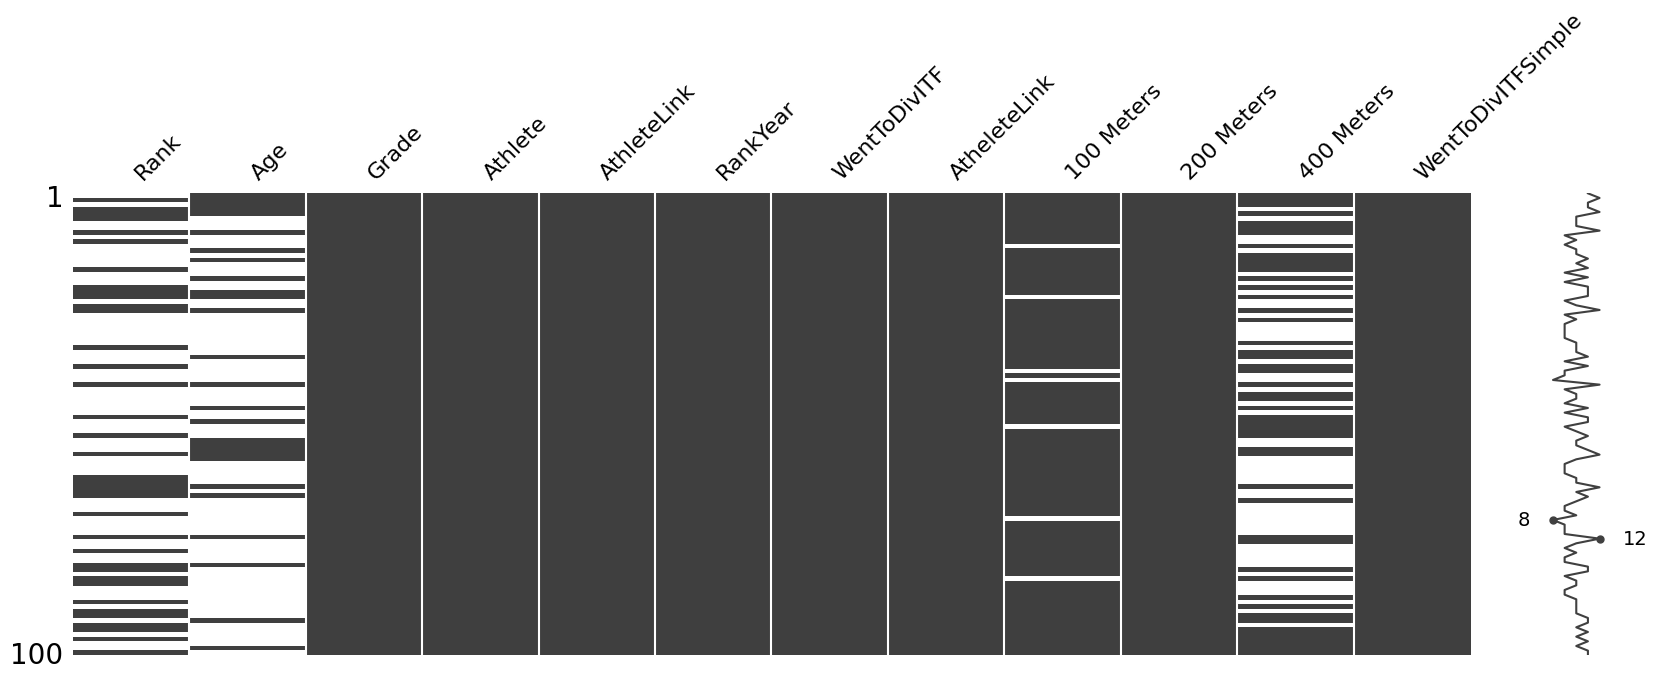

In [233]:
mno.matrix(df_athletes_best_times_2020, figsize = (20, 6))

In [234]:
df_athletes_best_times_2020.isnull().sum()

Rank                  63
Age                   73
Grade                  0
Athlete                0
AthleteLink            0
RankYear               0
WentToDivITF           0
AtheleteLink           0
100 Meters             7
200 Meters             0
400 Meters            51
WentToDivITFSimple     0
dtype: int64

In [235]:
df_athletes_best_times_2019_no_na = df_athletes_best_times_2019[df_athletes_best_times_2019["100 Meters"].notna() & df_athletes_best_times_2019["200 Meters"].notna() & df_athletes_best_times_2019["400 Meters"].notna()]

We should impute the missing values. We dont want to exclude the data we have that is missing a value and it should be reasonable to impute the times for one event based on the others

https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression



In [236]:
# missing_columns = ["100 Meters", "200 Meters", "400 Meters"]

In [237]:
X = df_athletes_best_times_2019[["100 Meters", "200 Meters", "400 Meters"]]
y = df_athletes_best_times_2019["WentToDivITFSimple"]

Plan:

1.   predict 200 from 100
2.   fill in 200
3.   predict 100 from 200
4.   fill in 100
5.   predict 400 from 20
6.   fill in 200

In [238]:
from sklearn import linear_model

def ImputeMissingScores(X):
  if (len(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()]) > 0) :
    model2 = linear_model.LinearRegression()
    # fit the model to the data with no Nan
    model2.fit(X = df_athletes_best_times_2019_no_na[["100 Meters"]], y = df_athletes_best_times_2019_no_na["200 Meters"])
    # only fill in the 200 meters where the 100 meters is present. If the 100 and 200 meters are not present this would not work
    X.loc[X["200 Meters"].isnull() & X["100 Meters"].notnull(), "Det" + "200 Meters"]  = model2.predict(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])
    X.loc[X["200 Meters"].isnull() & X["100 Meters"].notnull(), "200 Meters"]  = model2.predict(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])

  if (len(X[["100 Meters"]][X["100 Meters"].isnull() & X["200 Meters"].notnull()]) > 0) :
    model1 = linear_model.LinearRegression()
    # fit the model to the data with no Nan
    model1.fit(X = df_athletes_best_times_2019_no_na[["200 Meters"]], y = df_athletes_best_times_2019_no_na["100 Meters"])
    X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
    X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]

  if (len(X[["400 Meters"]][X["400 Meters"].isnull() & X["200 Meters"].notnull()]) > 0) :
    model4 = linear_model.LinearRegression()
    # fit the model to the data with no Nan
    model4.fit(X = df_athletes_best_times_2019_no_na[["200 Meters"]], y = df_athletes_best_times_2019_no_na["400 Meters"])
    X.loc[X["400 Meters"].isnull(), "Det" + "400 Meters"] = model1.predict(X[["200 Meters"]])[X["400 Meters"].isnull()]
    X.loc[X["400 Meters"].isnull(), "400 Meters"] = model1.predict(X[["200 Meters"]])[X["400 Meters"].isnull()]

  X = X[["100 Meters", "200 Meters", "400 Meters"]]

  return X

In [239]:
X = ImputeMissingScores(X)

<ipython-input-238-040f14f21f66>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-238-040f14f21f66>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-238-040f14f21f66>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [240]:
X

,100 Meters,200 Meters,400 Meters
0,11.54,24.05,11.884125
5,12.19,24.22,57.720000
6,11.74,24.41,12.071503
9,11.91,24.17,54.950000
27,11.98,24.33,57.190000
...,...,...,...
203,11.73,24.17,58.170000
204,12.03,24.42,56.340000
205,11.69,24.35,12.040273
206,12.05,24.06,54.740000


In [241]:
y

0      1
5      1
6      1
9      1
27     1
      ..
203    1
204    0
205    1
206    0
207    1
Name: WentToDivITFSimple, Length: 99, dtype: int64

In [242]:
len(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])

0

In [243]:
# if (len(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()]) > 0) :
#   model2 = linear_model.LinearRegression()
#   # fit the model to the data with no Nan
#   model2.fit(X = df_athletes_best_times_2019_no_na[["100 Meters"]], y = df_athletes_best_times_2019_no_na["200 Meters"])
#   # only fill in the 200 meters where the 100 meters is present. If the 100 and 200 meters are not present this would not work
#   X.loc[X["200 Meters"].isnull() & X["100 Meters"].notnull(), "Det" + "200 Meters"]  = model2.predict(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])
#   X.loc[X["200 Meters"].isnull() & X["100 Meters"].notnull(), "200 Meters"]  = model2.predict(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])

In [244]:
# if (len(X[["100 Meters"]][X["100 Meters"].isnull() & X["200 Meters"].notnull()]) > 0) :
#   model1 = linear_model.LinearRegression()
#   # fit the model to the data with no Nan
#   model1.fit(X = df_athletes_best_times_2019_no_na[["200 Meters"]], y = df_athletes_best_times_2019_no_na["100 Meters"])
#   X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
#   X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]

In [245]:
# if (len(X[["400 Meters"]][X["400 Meters"].isnull() & X["200 Meters"].notnull()]) > 0) :
#   model4 = linear_model.LinearRegression()
#   # fit the model to the data with no Nan
#   model4.fit(X = df_athletes_best_times_2019_no_na[["200 Meters"]], y = df_athletes_best_times_2019_no_na["400 Meters"])
#   X.loc[X["400 Meters"].isnull(), "Det" + "400 Meters"] = model1.predict(X[["200 Meters"]])[X["400 Meters"].isnull()]
#   X.loc[X["400 Meters"].isnull(), "400 Meters"] = model1.predict(X[["200 Meters"]])[X["400 Meters"].isnull()]

# EDA

In [246]:
df_athletes_best_times_2019

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters,WentToDivITFSimple
0,NaN,NaN,12,Kiana Foster,https://www.athletic.net/athlete/10051916/trac...,2019,YES,https://www.athletic.net/athlete/10051916/trac...,11.54,24.05,NaN,1
5,NaN,18.0,12,Zakiya Johnson,https://www.athletic.net/athlete/10282225/trac...,2019,YES,https://www.athletic.net/athlete/10282225/trac...,12.19,24.22,57.72,1
6,NaN,18.0,12,Serena Bolden,https://www.athletic.net/athlete/10299182/trac...,2019,YES,https://www.athletic.net/athlete/10299182/trac...,11.74,24.41,NaN,1
9,146.0,17.0,12,Alicia Thorpe,https://www.athletic.net/athlete/10742198/trac...,2019,YES,https://www.athletic.net/athlete/10742198/trac...,11.91,24.17,54.95,1
27,NaN,NaN,12,Nyla Barlow,https://www.athletic.net/athlete/10950209/trac...,2019,YES,https://www.athletic.net/athlete/10950209/trac...,11.98,24.33,57.19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,12,Georgie McDevitt,https://www.athletic.net/athlete/9800778/track...,2019,YES,https://www.athletic.net/athlete/9800778/track...,11.73,24.17,58.17,1
204,NaN,19.0,12,Leah Graybill,https://www.athletic.net/athlete/9847887/track...,2019,NO,https://www.athletic.net/athlete/9847887/track...,12.03,24.42,56.34,0
205,NaN,18.0,12,Alyssa-Simone Robinson,https://www.athletic.net/athlete/9893820/track...,2019,YES,https://www.athletic.net/athlete/9893820/track...,11.69,24.35,NaN,1
206,NaN,NaN,12,Mikeisha Covington,https://www.athletic.net/athlete/9896596/track...,2019,NO,https://www.athletic.net/athlete/9896596/track...,12.05,24.06,54.74,0


In [247]:
df_athletes_best_times_2019.corr(method='pearson')

<ipython-input-247-36331cadca04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_athletes_best_times_2019.corr(method='pearson')


,Rank,Age,RankYear,100 Meters,200 Meters,400 Meters,WentToDivITFSimple
Rank,1.000000,-0.325640,NaN,0.401028,0.866300,0.123274,-0.313043
Age,-0.325640,1.000000,NaN,-0.109923,-0.152175,0.214405,-0.189310
RankYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 Meters,0.401028,-0.109923,NaN,1.000000,0.510182,-0.269670,-0.093444
200 Meters,0.866300,-0.152175,NaN,0.510182,1.000000,0.247865,-0.166243
400 Meters,0.123274,0.214405,NaN,-0.269670,0.247865,1.000000,-0.001035
WentToDivITFSimple,-0.313043,-0.189310,NaN,-0.093444,-0.166243,-0.001035,1.000000


In [248]:
df_athletes_best_times_2020.corr(method='pearson')

<ipython-input-248-6bd5b95b1791>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_athletes_best_times_2020.corr(method='pearson')


,Rank,Age,RankYear,100 Meters,200 Meters,400 Meters,WentToDivITFSimple
Rank,1.000000,NaN,NaN,-0.035345,0.638496,0.192593,-0.052557
Age,NaN,1.000000,NaN,0.322722,0.066642,0.201343,-0.411377
RankYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 Meters,-0.035345,0.322722,NaN,1.000000,0.427832,-0.042469,-0.315108
200 Meters,0.638496,0.066642,NaN,0.427832,1.000000,0.278956,-0.198662
400 Meters,0.192593,0.201343,NaN,-0.042469,0.278956,1.000000,-0.298350
WentToDivITFSimple,-0.052557,-0.411377,NaN,-0.315108,-0.198662,-0.298350,1.000000


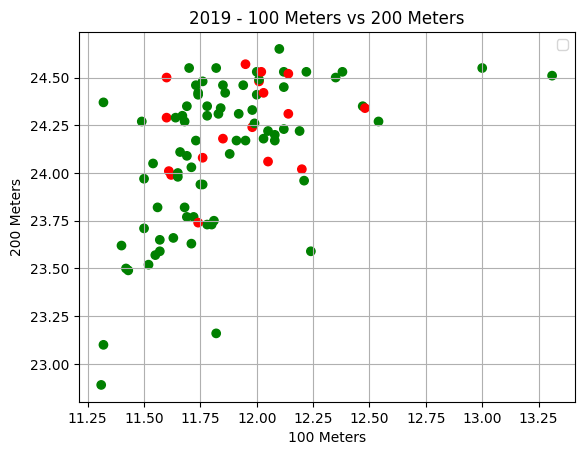

In [249]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2019['100 Meters'], df_athletes_best_times_2019['200 Meters'], c=df_athletes_best_times_2019['WentToDivITFSimple'].map(colors))

ax.legend()
ax.grid(True)

plt.title("2019 - 100 Meters vs 200 Meters")

plt.xlabel("100 Meters")
plt.ylabel("200 Meters")

plt.show()




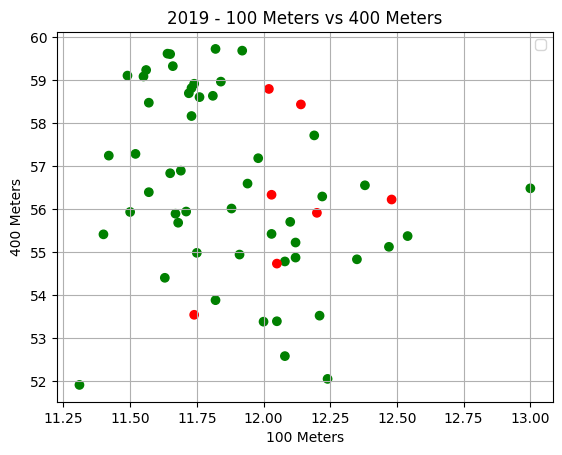

In [250]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2019['100 Meters'], df_athletes_best_times_2019['400 Meters'], c=df_athletes_best_times_2019['WentToDivITFSimple'].map(colors))

ax.legend()
ax.grid(True)

plt.title("2019 - 100 Meters vs 400 Meters")

plt.xlabel("100 Meters")
plt.ylabel("400 Meters")

plt.show()

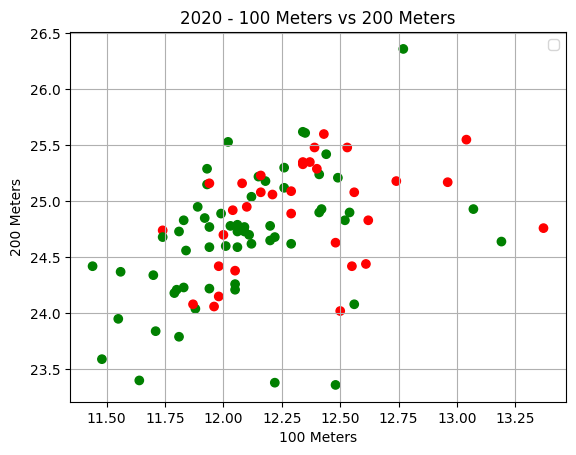

In [251]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2020['100 Meters'], df_athletes_best_times_2020['200 Meters'], c=df_athletes_best_times_2020['WentToDivITFSimple'].map(colors))

ax.legend()
ax.grid(True)

plt.title("2020 - 100 Meters vs 200 Meters")

plt.xlabel("100 Meters")
plt.ylabel("200 Meters")

plt.show()

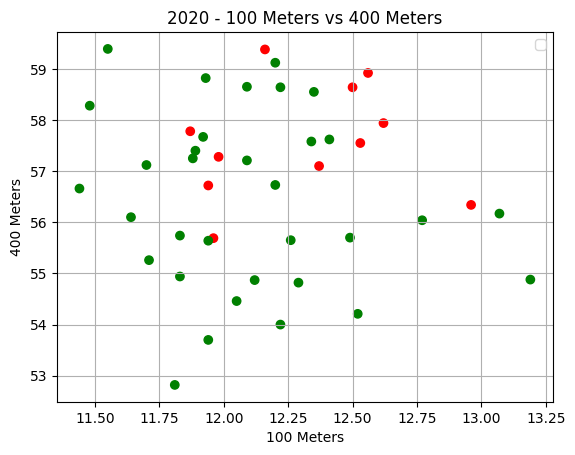

In [252]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2020['100 Meters'], df_athletes_best_times_2020['400 Meters'], c=df_athletes_best_times_2020['WentToDivITFSimple'].map(colors))

ax.legend()
ax.grid(True)

plt.title("2020 - 100 Meters vs 400 Meters")

plt.xlabel("100 Meters")
plt.ylabel("400 Meters")

plt.show()

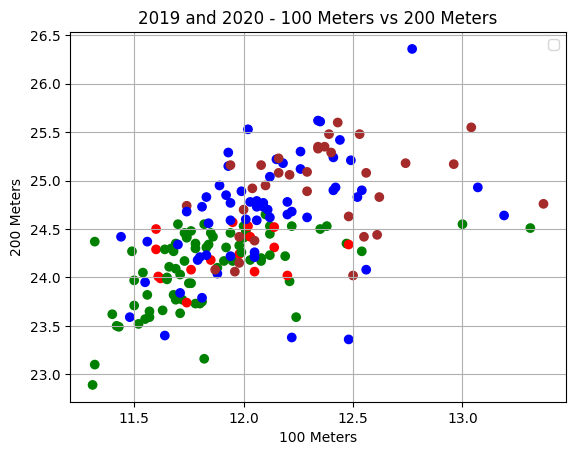

In [253]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2019['100 Meters'], df_athletes_best_times_2019['200 Meters'], c=df_athletes_best_times_2019['WentToDivITFSimple'].map(colors))

colors = {0:'brown', 1:'blue'}


scatter = ax.scatter(df_athletes_best_times_2020['100 Meters'], df_athletes_best_times_2020['200 Meters'], c=df_athletes_best_times_2020['WentToDivITFSimple'].map(colors))


ax.legend()
ax.grid(True)

plt.title("2019 and 2020 - 100 Meters vs 200 Meters")

plt.xlabel("100 Meters")
plt.ylabel("200 Meters")

plt.show()

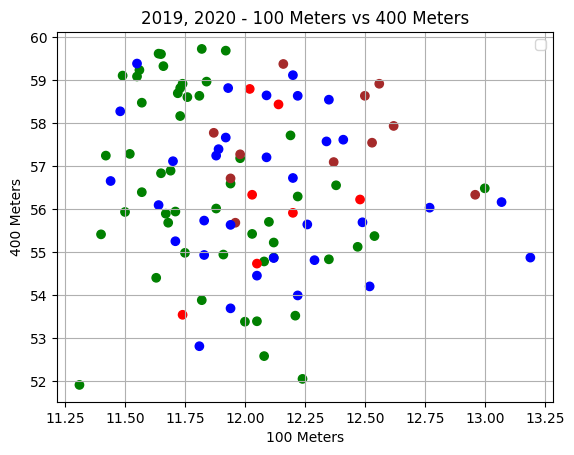

In [254]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2019['100 Meters'], df_athletes_best_times_2019['400 Meters'], c=df_athletes_best_times_2019['WentToDivITFSimple'].map(colors))

colors = {0:'brown', 1:'blue'}


scatter = ax.scatter(df_athletes_best_times_2020['100 Meters'], df_athletes_best_times_2020['400 Meters'], c=df_athletes_best_times_2020['WentToDivITFSimple'].map(colors))


ax.legend()
ax.grid(True)

plt.title("2019, 2020 - 100 Meters vs 400 Meters")

plt.xlabel("100 Meters")
plt.ylabel("400 Meters")

plt.show()

### get the percentage of students who went to DI track and field by year

In [255]:
len(df_athletes_best_times_2019)

99

In [256]:
len(df_athletes_best_times_2019[df_athletes_best_times_2019["WentToDivITFSimple"] == 0])

17

In [257]:
len(df_athletes_best_times_2019[df_athletes_best_times_2019["WentToDivITFSimple"] == 1])/len(df_athletes_best_times_2019)

0.8282828282828283

In [258]:
len(df_athletes_best_times_2020)

100

In [259]:
len(df_athletes_best_times_2020[df_athletes_best_times_2020["WentToDivITFSimple"] == 1])/len(df_athletes_best_times_2020)

0.64

# now logistic regression

In [260]:
# prompt: create a logistical regression model to predict WentToDivITFSimple based on "100 Meters", "200 Meters" and "400 meters"

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [261]:
import statsmodels.formula.api as smf

In [262]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [263]:
def print_scores(y, y_pred):

  print('Accuracy: %.3f' % accuracy_score(y, y_pred))
  print('F1: %.3f' % f1_score(y, y_pred))
  print('Precision: %.3f' % precision_score(y, y_pred))
  print('Recall: %.3f' % recall_score(y, y_pred))




## with 2019

In [264]:
X = df_athletes_best_times_2019[["100 Meters", "200 Meters", "400 Meters"]]
y = df_athletes_best_times_2019["WentToDivITFSimple"]
X = ImputeMissingScores(X)


<ipython-input-238-040f14f21f66>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-238-040f14f21f66>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-238-040f14f21f66>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [265]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [266]:
clf.coef_

array([[-0.41062423, -0.56062739,  0.02597426]])

In [267]:
scores = cross_val_score(clf, X, y, cv=3)

In [268]:
scores

array([0.81818182, 0.81818182, 0.81818182])

In [269]:
np.mean(scores)

0.8181818181818182

In [270]:

y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[ 0, 17],
       [ 1, 81]])

In [271]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

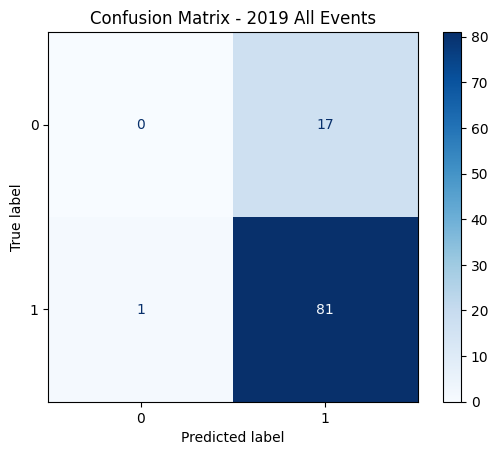

In [272]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 All Events")
plt.show()

In [273]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.83      0.99      0.90        82

    accuracy                           0.82        99
   macro avg       0.41      0.49      0.45        99
weighted avg       0.68      0.82      0.75        99



In [274]:
print_scores(y, y_pred)

Accuracy: 0.818
F1: 0.900
Precision: 0.827
Recall: 0.988


##### using stats in order to get p values

In [275]:
data_2019_for_stats =  pd.concat([X, y], axis=1)
data_2019_for_stats.rename(columns={'100 Meters':'M100', '200 Meters':'M200', '400 Meters':'M400'}, inplace=True)
formula = 'WentToDivITFSimple ~ M100+M200+M400'
model = smf.glm(formula = formula, data=data_2019_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                   99
Model:                            GLM   Df Residuals:                       95
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41.919
Date:                Sat, 11 Nov 2023   Deviance:                       83.839
Time:                        19:43:31   Pearson chi2:                     93.3
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06792
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5930     22.286      1.328      0.1



## with 2020

In [276]:
X = df_athletes_best_times_2020[["100 Meters", "200 Meters", "400 Meters"]]
y = df_athletes_best_times_2020["WentToDivITFSimple"]
X = ImputeMissingScores(X)


<ipython-input-238-040f14f21f66>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-238-040f14f21f66>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-238-040f14f21f66>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [277]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [278]:
clf.coef_

array([[-1.16629327, -0.36552737,  0.01672593]])

In [279]:
len(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])

0

In [280]:
scores = cross_val_score(clf, X, y, cv=3)

In [281]:
scores

array([0.70588235, 0.57575758, 0.63636364])

In [282]:
np.mean(scores)

0.6393345216874629

In [283]:
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[ 9, 27],
       [ 9, 55]])

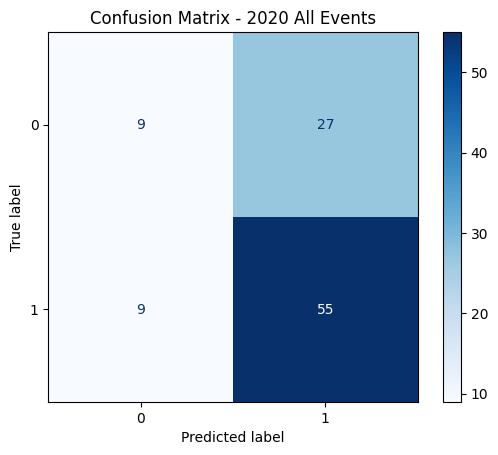

In [284]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2020 All Events")
plt.show()

In [285]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        36
           1       0.67      0.86      0.75        64

    accuracy                           0.64       100
   macro avg       0.59      0.55      0.54       100
weighted avg       0.61      0.64      0.60       100



In [286]:
print_scores(y, y_pred)

Accuracy: 0.640
F1: 0.753
Precision: 0.671
Recall: 0.859


#### using stats in order to get p values

In [287]:
data_2020_for_stats =  pd.concat([X, y], axis=1)
data_2020_for_stats.rename(columns={'100 Meters':'M100', '200 Meters':'M200', '400 Meters':'M400'}, inplace=True)
formula = 'WentToDivITFSimple ~ M100+M200+M400'
model = smf.glm(formula = formula, data=data_2020_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58.975
Date:                Sat, 11 Nov 2023   Deviance:                       117.95
Time:                        19:43:32   Pearson chi2:                     99.4
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1196
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1358     11.682      2.408      0.0

## Logistic regression using only one variable (event) at a time with no imputed values

https://medium.com/@prustaniket/p-value-for-linear-and-logistic-regression-in-stats-model-api-332fda81a39f

### 2019

#### 100 meters

In [288]:
X= df_athletes_best_times_2019[["100 Meters"]][ df_athletes_best_times_2019["100 Meters"].notnull()]
y = df_athletes_best_times_2019["WentToDivITFSimple"][ df_athletes_best_times_2019["100 Meters"].notnull()]


In [289]:
scores = cross_val_score(clf, X, y, cv=3)
scores

array([0.83870968, 0.80645161, 0.80645161])

In [290]:
np.mean(scores)

0.8172043010752686

In [291]:
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[ 0, 17],
       [ 0, 76]])

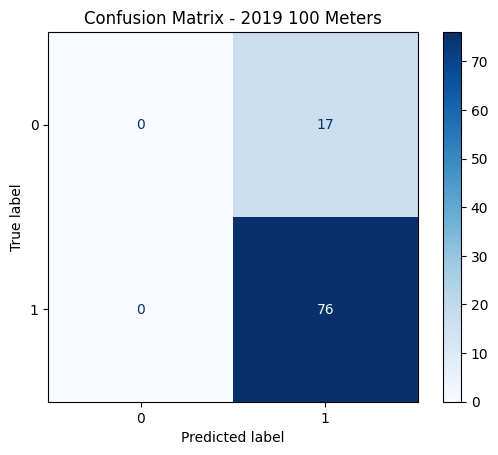

In [292]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 100 Meters")
plt.show()

In [293]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.82      1.00      0.90        76

    accuracy                           0.82        93
   macro avg       0.41      0.50      0.45        93
weighted avg       0.67      0.82      0.74        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
print_scores(y, y_pred)

Accuracy: 0.817
F1: 0.899
Precision: 0.817
Recall: 1.000


#### use stats for p values

In [295]:
data_2019_100_for_stats =  pd.concat([X, y], axis=1)
data_2019_100_for_stats.rename(columns={'100 Meters':'M100'}, inplace=True)
formula = 'WentToDivITFSimple ~ M100'
model = smf.glm(formula = formula, data=data_2019_100_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                   93
Model:                            GLM   Df Residuals:                       91
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.849
Date:                Sat, 11 Nov 2023   Deviance:                       87.699
Time:                        19:43:34   Pearson chi2:                     92.0
No. Iterations:                     4   Pseudo R-squ. (CS):           0.008183
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5686      9.076      1.054      0.2

#### 200 meters

In [296]:
X= df_athletes_best_times_2019[["200 Meters"]][ df_athletes_best_times_2019["200 Meters"].notnull()]
y = df_athletes_best_times_2019["WentToDivITFSimple"][ df_athletes_best_times_2019["200 Meters"].notnull()]


In [297]:
scores = cross_val_score(clf, X, y, cv=3)
scores

array([0.84848485, 0.81818182, 0.81818182])

In [298]:
np.mean(scores)

0.8282828282828283

In [299]:
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[ 0, 17],
       [ 0, 82]])

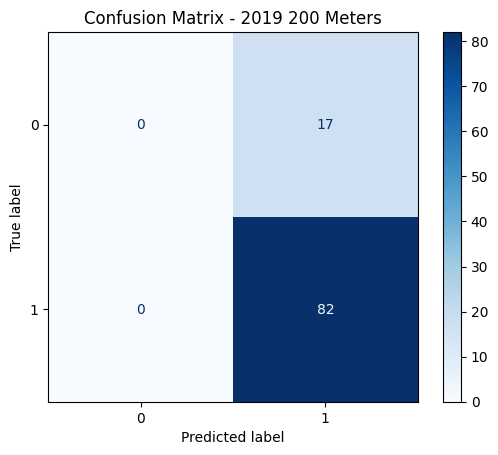

In [300]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 200 Meters")
plt.show()

In [301]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.83      1.00      0.91        82

    accuracy                           0.83        99
   macro avg       0.41      0.50      0.45        99
weighted avg       0.69      0.83      0.75        99



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [302]:
print_scores(y, y_pred)

Accuracy: 0.828
F1: 0.906
Precision: 0.828
Recall: 1.000


#### use stats for p values

In [303]:
data_2019_200_for_stats =  pd.concat([X, y], axis=1)
data_2019_200_for_stats.rename(columns={'200 Meters':'M200'}, inplace=True)
formula = 'WentToDivITFSimple ~ M200'
model = smf.glm(formula = formula, data=data_2019_200_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                   99
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.851
Date:                Sat, 11 Nov 2023   Deviance:                       87.702
Time:                        19:43:35   Pearson chi2:                     95.4
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03083
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6128     22.309      1.686      0.0

#### 400 meters

In [304]:
X= df_athletes_best_times_2019[["400 Meters"]][ df_athletes_best_times_2019["400 Meters"].notnull()]
y = df_athletes_best_times_2019["WentToDivITFSimple"][ df_athletes_best_times_2019["400 Meters"].notnull()]

In [305]:
scores = cross_val_score(clf, X, y, cv=3)
scores

array([0.86363636, 0.9047619 , 0.9047619 ])

In [306]:
np.mean(scores)

0.891053391053391

In [307]:
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[ 0,  7],
       [ 0, 57]])

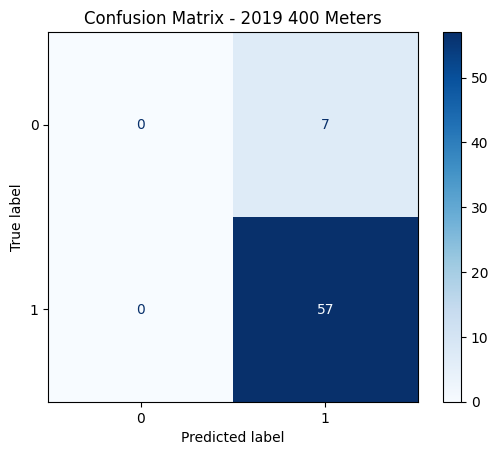

In [308]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 400 Meters")
plt.show()

In [309]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        57

    accuracy                           0.89        64
   macro avg       0.45      0.50      0.47        64
weighted avg       0.79      0.89      0.84        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [310]:
print_scores(y, y_pred)

Accuracy: 0.891
F1: 0.942
Precision: 0.891
Recall: 1.000


#### use stats for p values

In [311]:
data_2019_400_for_stats =  pd.concat([X, y], axis=1)
data_2019_400_for_stats.rename(columns={'400 Meters':'M400'}, inplace=True)
formula = 'WentToDivITFSimple ~ M400'
model = smf.glm(formula = formula, data=data_2019_400_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                   64
Model:                            GLM   Df Residuals:                       62
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22.093
Date:                Sat, 11 Nov 2023   Deviance:                       44.186
Time:                        19:43:36   Pearson chi2:                     64.0
No. Iterations:                     5   Pseudo R-squ. (CS):          1.071e-06
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1857     10.699      0.204      0.8

### 2020

#### 100 meters

0.6559139784946236


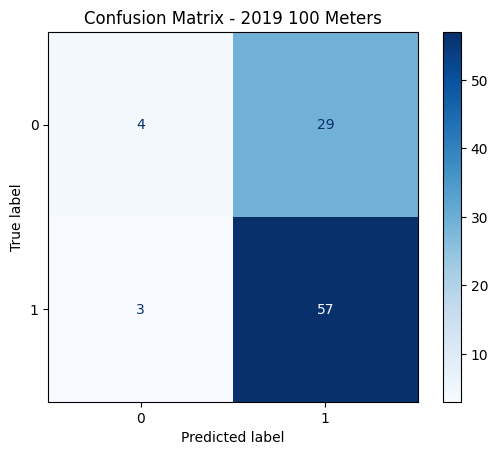

In [312]:
X= df_athletes_best_times_2020[["100 Meters"]][ df_athletes_best_times_2020["100 Meters"].notnull()]
y = df_athletes_best_times_2020["WentToDivITFSimple"][ df_athletes_best_times_2020["100 Meters"].notnull()]
scores = cross_val_score(clf, X, y, cv=3)
scores
print(np.mean(scores))
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 100 Meters")
plt.show()


In [313]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.12      0.20        33
           1       0.66      0.95      0.78        60

    accuracy                           0.66        93
   macro avg       0.62      0.54      0.49        93
weighted avg       0.63      0.66      0.57        93



In [314]:
print_scores(y, y_pred)

Accuracy: 0.656
F1: 0.781
Precision: 0.663
Recall: 0.950


#### use stats for p values

In [315]:
data_2020_100_for_stats =  pd.concat([X, y], axis=1)
data_2020_100_for_stats.rename(columns={'100 Meters':'M100'}, inplace=True)
formula = 'WentToDivITFSimple ~ M100'
model = smf.glm(formula = formula, data=data_2020_100_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                   93
Model:                            GLM   Df Residuals:                       91
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.766
Date:                Sat, 11 Nov 2023   Deviance:                       111.53
Time:                        19:43:36   Pearson chi2:                     91.5
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09653
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.2150      8.325      2.909      0.0

#### 200 meters

0.6298276886512181


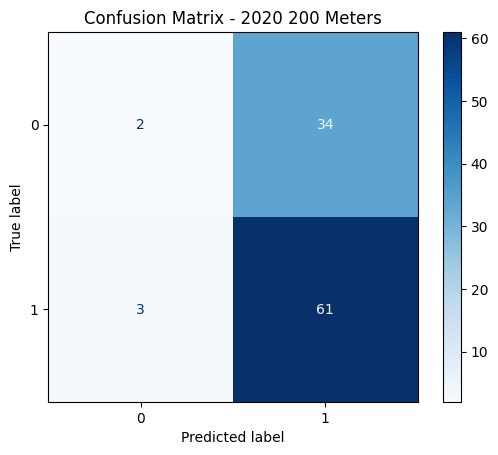

In [316]:
X= df_athletes_best_times_2020[["200 Meters"]][ df_athletes_best_times_2020["200 Meters"].notnull()]
y = df_athletes_best_times_2020["WentToDivITFSimple"][ df_athletes_best_times_2020["200 Meters"].notnull()]
scores = cross_val_score(clf, X, y, cv=3)
scores
print(np.mean(scores))
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2020 200 Meters")
plt.show()


In [317]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.06      0.10        36
           1       0.64      0.95      0.77        64

    accuracy                           0.63       100
   macro avg       0.52      0.50      0.43       100
weighted avg       0.55      0.63      0.53       100



In [318]:
print_scores(y, y_pred)

Accuracy: 0.630
F1: 0.767
Precision: 0.642
Recall: 0.953


####use stats for p values

In [319]:
data_2020_200_for_stats =  pd.concat([X, y], axis=1)
data_2020_200_for_stats.rename(columns={'200 Meters':'M200'}, inplace=True)
formula = 'WentToDivITFSimple ~ M200'
model = smf.glm(formula = formula, data=data_2020_200_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.296
Date:                Sat, 11 Nov 2023   Deviance:                       126.59
Time:                        19:43:37   Pearson chi2:                     99.5
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04009
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8785     10.471      1.994      0.0

#### 400 meters

0.7156862745098039


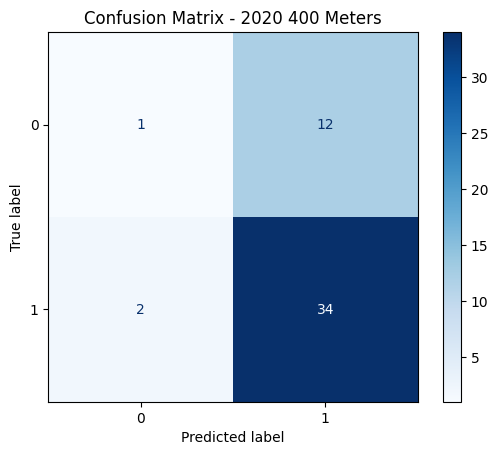

In [320]:
X= df_athletes_best_times_2020[["400 Meters"]][ df_athletes_best_times_2020["400 Meters"].notnull()]
y = df_athletes_best_times_2020["WentToDivITFSimple"][ df_athletes_best_times_2020["400 Meters"].notnull()]
scores = cross_val_score(clf, X, y, cv=3)
scores
print(np.mean(scores))
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2020 400 Meters")
plt.show()

In [321]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.08      0.12        13
           1       0.74      0.94      0.83        36

    accuracy                           0.71        49
   macro avg       0.54      0.51      0.48        49
weighted avg       0.63      0.71      0.64        49



In [322]:
print_scores(y, y_pred)

Accuracy: 0.714
F1: 0.829
Precision: 0.739
Recall: 0.944


#### use stats for p values

In [323]:
data_2020_400_for_stats =  pd.concat([X, y], axis=1)
data_2020_400_for_stats.rename(columns={'400 Meters':'M400'}, inplace=True)
formula = 'WentToDivITFSimple ~ M400'
model = smf.glm(formula = formula, data=data_2020_400_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                   49
Model:                            GLM   Df Residuals:                       47
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.047
Date:                Sat, 11 Nov 2023   Deviance:                       52.094
Time:                        19:43:39   Pearson chi2:                     46.0
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08965
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.2447     12.640      2.076      0.0

https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/

https://www.youtube.com/watch?v=zGdQ8fbl6j4